<a href="https://colab.research.google.com/github/Fedor-Kochetkov/-__Portfolio__/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_KZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ авторынка Казахстана 2019 год


**Описание:**

В датасете представлены данные о продажах новых автомобилей в Казахстане за 9 месяцев 2019 года. Необходимо проанализировать рынок автомобилей в целом (емкость, динамику, конкурентную среду) и оценить позицию автоцентра Меркур авто на рынке: анализ внешней и внутренней среды автоцентра. Данные содержат множество ошибок, поэтому перед анализом необходимо провести предобработку данных.

**Цель работы:**

- Определить рыночные сегменты и позицию на рынке для Меркур Авто

**Задачи:**

- Предобработка данных;
- Исследовательский анализ данных;
- Анализ рынка автомобилей Казахстана;
- Анализ позиции Меркур Авто: внутренная и внешняя среда.

**Анализ рынка:**

- Емкость рынка автомобилей: в денежном и количественном выражении;
- Марки лидеры на рынке автомобилей;
- Динамика рынка: общая, по сегментам;
- Продажи автомобилей в разрезе бренд / сегмент;
- Продажи по маркам;
- Продажи по регионам;
- Проверить гипотезу: стоимость автомобиля зависит от уровня развития региона (средней заработной платы по региону);
- Продажи автоцентров;
- Модели-лидеры на рынке.
- Анализ положения Меркур Авто:

## Загрузка и оценка данных

In [1]:
! pip install squarify

In [2]:

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import calendar
from datetime import datetime
import squarify
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import warnings
pd.set_option('display.max_columns', None)

In [3]:
link = 'https://drive.google.com/file/d/12Q26yhE2rJjPvIwWZfaIVk3CpKywX7l_/view?usp=sharing'
file_id = link.split('/')[-2]

In [4]:
df = pd.read_csv(f'https://drive.google.com/uc?export=download&id={file_id}', sep=';')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

Настроим параметры визуализации

In [6]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [7]:
plt.style.use('petroff10')
sns.set_style('whitegrid')

In [8]:
# Настраиваем формат десятичных значений с точностью до двух знаков
pd.set_option('display.float_format', '{:.2f}'.format)
# Отключаем предупреждения
warnings.filterwarnings('ignore')

# Предобработка данных

Данные представлены за 2019 год, 24 столбца и почти 40 000 строк. Переведем столбцы на Анг.язык и приведем к нижнему регистру для удобства работы с данными

In [9]:
ang = ({'Год':'year',
    'Месяц': 'month',
    'Компания': 'company',
    'Бренд': 'brand',
    'Модель': 'model',
    'Модификация': 'modification',
    'Год выпуска': 'release',
    'Страна-производитель': 'country',
    'Вид топлива': 'fuel_type',
    'Объём двиг, л,': 'engine_vol',
    'Коробка передач': 'gearbox',
    'Тип привода': 'drive_type',
    'Сегмент': 'segment',
    'Регион': 'region',
    'Наименование дилерского центра': 'dealer_name',
    'Тип клиента': 'client_type',
    'Форма расчета': 'payment_type',
    'Количество': 'quantity',
    'Цена, USD': 'price_usd',
    'Продажа, USD': 'sales_usd',
    'Область': 'area',
    'Сегментация 2013': 'segment_2013',
    'Класс 2013': 'class_2013',
    'Сегментация Eng': 'segment_eng',
    'Локализация производства': 'localization'})

df = df.rename(columns = ang)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          39966 non-null  int64  
 1   month         39966 non-null  object 
 2   company       39966 non-null  object 
 3   brand         39966 non-null  object 
 4   model         39966 non-null  object 
 5   modification  36375 non-null  object 
 6   release       39465 non-null  object 
 7   country       39966 non-null  object 
 8   fuel_type     36826 non-null  object 
 9   engine_vol    35708 non-null  object 
 10  gearbox       36711 non-null  object 
 11  drive_type    35677 non-null  object 
 12  segment       33205 non-null  object 
 13  region        39966 non-null  object 
 14  dealer_name   39966 non-null  object 
 15  client_type   32919 non-null  object 
 16  payment_type  14038 non-null  object 
 17  quantity      39960 non-null  float64
 18  price_usd     39966 non-nu

Изменим тип данных в столбцах количество, стоимость и цена продажи

In [10]:
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['price_usd'] = df['price_usd'].str.replace(',', '.').str.replace(' ', '')
df['sales_usd'] = df['sales_usd'].str.replace(',', '.').str.replace(' ', '')

In [11]:
for col in ['price_usd', 'sales_usd']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
df.isna().sum()

,0
year,0
month,0
company,0
brand,0
model,0
modification,3591
release,501
country,0
fuel_type,3140
engine_vol,4258


Посмотрим качество данных

In [13]:
def pass_value_barh(df):
    try:
        ax = (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns={0: 'space'})
            .query('space > 0')
            .sort_values(by='space', ascending=True)
            .plot(kind='barh', figsize=(19, 6), legend=False, fontsize=16)
        )
        ax.set_title('Пропуски' + "\n", fontsize=22, color='SteelBlue')
        ax.set_xlim(0, 100)  # Устанавливаем диапазон оси X до 100 (так как это проценты)
        # Для горизонтальных барчартов xlim устанавливает диапазон значений, а ylim - количество баров
    except Exception as e:
        print(f'Пропусков не осталось :) или произошла ошибка: {e}')

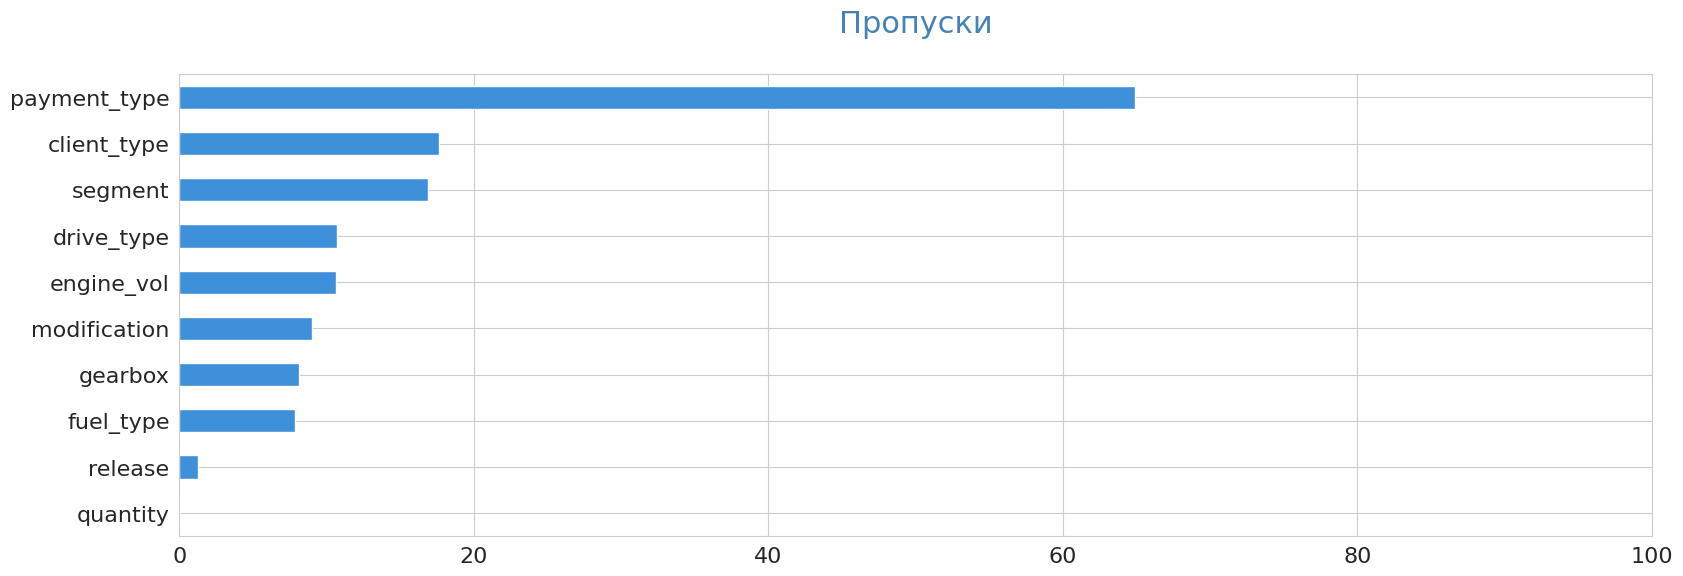

In [14]:
pass_value_barh(df)

In [176]:
temp = df.copy()
list_c = df.columns.tolist()
for col_l in list_c:
    print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%')

year : кол-во NaN 0 , процент NaN 0.0 %
month : кол-во NaN 0 , процент NaN 0.0 %
company : кол-во NaN 0 , процент NaN 0.0 %
brand : кол-во NaN 0 , процент NaN 0.0 %
model : кол-во NaN 0 , процент NaN 0.0 %
country : кол-во NaN 0 , процент NaN 0.0 %
fuel_type : кол-во NaN 0 , процент NaN 0.0 %
engine_vol : кол-во NaN 0 , процент NaN 0.0 %
gearbox : кол-во NaN 0 , процент NaN 0.0 %
drive_type : кол-во NaN 0 , процент NaN 0.0 %
region : кол-во NaN 0 , процент NaN 0.0 %
client_type : кол-во NaN 0 , процент NaN 0.0 %
quantity : кол-во NaN 0 , процент NaN 0.0 %
price_usd : кол-во NaN 0 , процент NaN 0.0 %
sales_usd : кол-во NaN 0 , процент NaN 0.0 %
area : кол-во NaN 0 , процент NaN 0.0 %
segment_2013 : кол-во NaN 0 , процент NaN 0.0 %
localization : кол-во NaN 0 , процент NaN 0.0 %
date_price : кол-во NaN 0 , процент NaN 0.0 %


В Данных большое количество пропусков, разберем каждый столбец, посмотрим что можно исправить

In [16]:
df.head()

,year,month,company,brand,model,modification,release,country,fuel_type,engine_vol,gearbox,drive_type,segment,region,dealer_name,client_type,payment_type,quantity,price_usd,sales_usd,area,segment_2013,class_2013,segment_eng,localization
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.00,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1.00,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.00,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.00,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.00,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт


## Удаление лишних данных

In [17]:
df = (df.drop(columns=['modification','release','segment','dealer_name','payment_type','class_2013','segment_eng']))
df = df.dropna(subset=('quantity'))

Избавляемся от не нужных столбцов, они либо дублируют друг друга либо не несут ценности для дальнейшего анализа + удалим 6 строчек где не указано количество автомобилей в заказе

## Заполнение данных

In [18]:
# Форматирование осей на графиках
def millions_formatter(x, pos):
    return f"{x:,.0f}"

In [19]:
# Преобразуем месяц в конкретную дату с последним числом месяца для удобства анализа
def format_month_to_date(month):
    month_map = {
        'Январь': 1,
        'Февраль': 2,
        'Март': 3,
        'Апрель': 4,
        'Май': 5,
        'Июнь': 6,
        'Июль': 7,
        'Август': 8,
        'Сентябрь': 9,
        'Октябрь': 10,
        'Ноябрь': 11,
        'Декабрь': 12
    }
    month_number = month_map.get(month)
    if month_number is None:
        return None
    return f"30.{month_number:02}"

In [20]:
# Категоризируем авто по виду топлива
def standardize_fuel_type(fuel_type):
    fuel_type = str(fuel_type).strip()
    if fuel_type in ['бензин','бензин ','2','1,6','0']:
        return 'F'
    if fuel_type in ['дизель','дизель ']:
        return 'D'
    if fuel_type in ['гибрид']:
        return 'HYB'
    if fuel_type in ['электро','электричество']:
        return 'E'
    else:
        return None

In [21]:
# Категоризируем коробку передач
def kpp(gearbox):
    gearbox = str(gearbox)
    if gearbox in ('nan','0'):
        return None
    if gearbox.strip() in ['5 МТ','MT','5МТ','Мех.','6 MT','6MT','МКПП','МТ','6 МТ','6МТ','5MT','6M/T','МT','5M','M/T','МКП','5М','М/T']:
        return 'МТ'
    else:
        return 'АТ'

In [22]:
# Категоризируем тип привода
def replace_with_4wd(drive_type):
    drive_type = str(drive_type)
    if drive_type.strip() in ['0','nan']:
        return None
    if drive_type.strip() in ['ЗАДНИЙ','FR','АСТАНА']:
        return 'RWD'
    if drive_type.strip() in ['ПЕРЕДНИЙ','ПЕРЕДНИЙ (FF)','FF']:
        return 'FWD'
    if drive_type.strip() in ['4WD', 'AWD', '4MOTION', 'ПОЛНЫЙ', '4 WD', 'ПОЛНЫЙ ', '4WDЛНЫЙ', '4WD ', 'ПОЛЫЙ','QUATTRO']:
        return '4WD'
    if drive_type.strip() in ['2WD','4Х2.2','2 WD']:
        return '2WD'
    else:
        return drive_type

In [23]:
df.duplicated().sum()

np.int64(22979)

In [24]:
df['drive_type'].unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана',
       'Передний (FF)', '0', 'FF', '#Н/Д', 'полный', '4Motion'],
      dtype=object)

In [25]:
df[df.duplicated(keep='first')].sample(5)

,year,month,company,brand,model,country,fuel_type,engine_vol,gearbox,drive_type,region,client_type,quantity,price_usd,sales_usd,area,segment_2013,localization
3069,2019,Март,Astana Motors,Hyundai,Accent,Республика Казахстан,Бензин,"1,6",6 AT,2 WD,Нур-Султан,Физ. Лицо,1.00,16419.10,16419.10,г.Нур-Султан,Легковые автомобили,Локальное производство
7226,2019,Апрель,Astana Motors,Hyundai,Elantra,Республика Казахстан,Бензин,"1,6",6AT,2WD,Атырау,Физ. Лицо,1.00,18680.16,18680.16,Атырауская область,Легковые автомобили,Локальное производство
14159,2019,Июль,Allur Auto,Jac,S3,Республика Казахстан,Бензин,"1,6",CVT,2WD,ЭКСПОРТ,Юр. Лицо,1.00,8780.58,8780.58,Экспорт область,Внедорожники,Локальное производство
35108,2019,Февраль,Toyota Motor Kazakhstan,Toyota,LC200,Япония,Бензин,"4,6",AT,4WD,Алматы,Физ. Лицо,1.00,72618.12,72618.12,г.Алматы,Внедорожники,Импорт
24746,2019,Март,Renault Россия,Renault,Logan,Российская Федерация,NaN,NaN,NaN,NaN,Алматы,Физ. Лицо,1.00,10651.13,10651.13,г.Алматы,Легковые автомобили,Импорт


В рамках защиты персональных данных, нам не представлены "Id" клиентов. Из за чего у нас появилось 22 979 дубликатов. Считаем что дубликатов нет, работаем с данными

In [26]:
df.month.unique()

array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], dtype=object)

Данные представлены за 9 месяцев с января по сентябрь

In [27]:
df.company.unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'Каспиан Моторс', 'СемАЗ', 'Astana Motors', 'Astana Motors ',
       'Hyundai Com Trans Kazakhstan ', 'Nissan Manufacturing RUS',
       'СВС-ТРАНС', 'Allur Auto', 'Almaty Motors Premium', 'TERRA MOTORS',
       'ТК КАМАЗ', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'Автокапитал', 'ММС Рус', 'MMC RUS', 'Mercur Autos',
       'УзАвто-Казахстан', 'Равон Моторс Казахстан',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан', 'Hino Motors '],
      dtype=object)

In [28]:
df.company.str.strip().unique()
df.company = df.company.str.strip().replace({'Mercur Autos':'Mercur Auto',
                                'ММС Рус':'MMC RUS',
                                'Автокапитал':'Autokapital',
                                'Равон Моторс Казахстан':'Ravon Motors Kazakstan',
                                'Хино Моторс Казахстан': 'Hino Motors',
                                'Каспиан Моторс':'Caspian Motors'})

В столбце компаний есть неявные дубликаты, приведем названия к общему виду

In [29]:
print(f'Всего представлено {len(df.brand.unique())} брендов')
list(df.brand.unique())

Всего представлено 46 брендов


['Audi',
 'BMW',
 'Chevrolet',
 'Daewoo',
 'Ford',
 'Foton',
 'GAZ',
 'Hyundai',
 'Hyundai Truck & Bus',
 'Infiniti',
 'Isuzu',
 'Iveco',
 'Jac',
 'Jaguar',
 'KAMAZ',
 'Kia',
 'Lada',
 'Land Rover',
 'Lexus',
 'Lifan',
 'MAN',
 'Mazda',
 'Mercedes-Benz',
 'Mercedes-Benz Trucks',
 'Mini',
 'Mitsubishi',
 'Nissan',
 'Peugeot',
 'Porsche',
 'Ravon',
 'Renault',
 'Scania',
 'Skoda',
 'Subaru',
 'Toyota',
 'UAZ',
 'Volkswagen',
 'Volvo',
 'Урал',
 'Cadillac',
 'Shacman',
 'Hino',
 'Dong Feng',
 'ANKAI',
 'Nefaz',
 'Yutong']

Далее посмотрим какие модели представлены у брендов

In [30]:
df.groupby('brand').agg({'model':'unique'}).reset_index()

,brand,model
0,ANKAI,"[HF-D105, HFF6850G, HFF6124G03EV3, HFF6127GZ-4]"
1,Audi,"[A3, A4, A6, A7, A8, Q5, Q7, Q8, RS5]"
2,BMW,"[3 серия, 5 серия, 6 серия, 7 серия, X1, X3, X..."
3,Cadillac,"[Escalade, XT5]"
4,Chevrolet,"[Aveo, Captiva, Niva, Tahoe, Tracker, Traverse..."
5,Daewoo,"[BS 106 A, BS 106 D, BC 211 MA, BC 095]"
6,Dong Feng,[BWC6665GA5]
7,Ford,"[Fiesta, Mondeo]"
8,Foton,"[BJ3253DMPKB-AD, BJ1069VDJEA-F1]"
9,GAZ,"[2217, 2310, 2705, 2752, 3221, 3302, 3308, 330..."


Модели внесены корректно

## Обработка стран

In [31]:
df.country.unique()

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'Таиланд', 'Китай',
       'UK', 'Узбекистан', 'Венгрия', 'Турция', 'Испания', 'Нидерланды',
       'Польша', 'Швеция', 'Белоруссия', 'Бельгия'], dtype=object)

In [32]:
countries = pd.read_table('https://www.artlebedev.ru/country-list/tab/')
countries.sample(5)

,name,fullname,english,alpha2,alpha3,iso,location,location-precise
228,Центрально-Африканская Республика,NaN,Central African Republic,CF,CAF,140,Африка,Центральная Африка
40,"Виргинские острова, США",Виргинские острова Соединенных Штатов,"Virgin Islands, U.S.",VI,VIR,850,Америка,Карибский бассейн
169,Реюньон,NaN,Reunion,RE,REU,638,Африка,Восточная Африка
230,Черногория,Республика Черногория,Montenegro,ME,MNE,499,Европа,Южная Европа
178,Северные Марианские острова,Содружество Северных Марианских островов,Northern Mariana Islands,MP,MNP,580,Океания,Микронезия


In [33]:
names_dict = dict(zip(countries.name, countries.alpha3))
full_names_dict = dict(zip(countries.fullname, countries.alpha3))

In [34]:
(
    df.country.value_counts()
    .reset_index()
    .rename(columns={'country': 'Страна', 'count': 'Количество упоминаний'})
    .nlargest(10, 'Количество упоминаний')
    )

,Страна,Количество упоминаний
0,Республика Казахстан,19363
1,Российская Федерация,12846
2,Япония,4595
3,Турция,1167
4,Таиланд,970
5,США,289
6,Германия,265
7,UK,197
8,Китай,94
9,Узбекистан,70


In [35]:
df.country = df.country.str.replace('Российская федерация', 'Российская Федерация')

In [36]:
df.country = df.country.map(lambda cell: full_names_dict.get(cell, cell))

In [37]:
df.country = df.country.map(lambda cell: names_dict.get(cell, cell))

In [38]:
df.country.value_counts().nlargest(21).reset_index()

,country,count
0,KAZ,19363
1,RUS,12846
2,JPN,4595
3,TUR,1167
4,THA,970
5,США,289
6,DEU,265
7,UK,197
8,CHN,94
9,UZB,70


In [39]:
df.country = df.country.str.replace('США', 'USA').str.replace('Корея', 'KOR').str.replace('UK', 'GBR').str.replace('Белоруссия','BLR')

In [40]:
df.country.unique()

array(['DEU', 'USA', 'AUT', 'KAZ', 'RUS', 'KOR', 'JPN', 'THA', 'CHN',
       'GBR', 'UZB', 'HUN', 'TUR', 'ESP', 'NLD', 'POL', 'SWE', 'BLR',
       'BEL'], dtype=object)

Привели названия стран к Alpha3

## Вид топлива

In [41]:
df.fuel_type.unique()

array(['Бензин', 'Дизель', nan, 'дизель ', 'бензин ', 'гибрид', '2',
       '1,6', '0', 'Электро', 'Электричество'], dtype=object)

In [42]:
df['fuel_type'] = df['fuel_type'].str.lower()
rt = ['2','1,6','0']
df.query('fuel_type in @rt').groupby(['brand','model']).agg({'fuel_type':'unique'}).reset_index()

,brand,model,fuel_type
0,Renault,Duster,"[2, 1,6]"
1,Renault,Sandero,"[1,6]"
2,UAZ,3741,[0]


В столбец тип топлива занесли данные по объему двигателя, модели с указаным объемом двс относятся к бензиновым, исправляем.

In [43]:
df['fuel_type'] = df['fuel_type'].apply(standardize_fuel_type)

Применяем к столбцу вид топлива функцию которая заменит данные на категориии\
Меняем обозначения для топлива:
- F - Бензин,
- D - Дизель,
- E - Электрический,
- HYB - Гибрид
- G - Газ

In [44]:
df['fuel_type'].isna().sum()

np.int64(3140)

In [45]:
df['fuel_type'] = df['fuel_type'].fillna('unk')

Осталось 3140 пропуск, заполним их значением "unk" неизвестно

## Объем ДВС

In [46]:
df['engine_vol'].unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', 'MT', 'AT', '0', '13', '1,33', '#Н/Д', '4.0', '2.4G',
       '2,4G', '2.8', '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6',
       '4,9', '2.0h', '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH',
       '8,4 L,', 

In [47]:
df['engine_vol'].unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', 'MT', 'AT', '0', '13', '1,33', '#Н/Д', '4.0', '2.4G',
       '2,4G', '2.8', '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6',
       '4,9', '2.0h', '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH',
       '8,4 L,', 

Данные не корректны, вместо запятой точка, добалены символы. \
Обработаем данные оставим только числа с разделителем точка. \
Есть обозначения трансмиссии, возможно перепутали столбцы, еще
посмотрим что за авто где объем двс 400 Л.С и 88 KWH  

In [48]:
df[df['engine_vol']=='88 KWH']

,year,month,company,brand,model,country,fuel_type,engine_vol,gearbox,drive_type,region,client_type,quantity,price_usd,sales_usd,area,segment_2013,localization
39818,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Локальное производство
39819,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Локальное производство
39820,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Локальное производство
39821,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Локальное производство
39822,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Локальное производство
39823,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Локальное производство
39824,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Локальное производство
39825,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Локальное производство
39826,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Локальное производство
39827,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,KAZ,E,88 KWH,NaN,2WD,Костанай,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Локальное производство


In [49]:
df[df['engine_vol']=='400 Л.С.']

,year,month,company,brand,model,country,fuel_type,engine_vol,gearbox,drive_type,region,client_type,quantity,price_usd,sales_usd,area,segment_2013,localization
39544,2019,Февраль,Almaty Motors Premium,Jaguar,I-Pace,GBR,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,Физ. Лицо,1.00,117236.97,117236.97,г.Алматы,Внедорожники,Импорт
39545,2019,Апрель,Almaty Motors Premium,Jaguar,I-Pace,GBR,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,Физ. Лицо,1.00,105388.79,105388.79,г.Алматы,Внедорожники,Импорт
39546,2019,Июнь,Almaty Motors Premium,Jaguar,I-Pace,GBR,E,400 Л.С.,РЕДУКТОР,4WD,Алматы,Юр. Лицо,1.00,120413.28,120413.28,г.Алматы,Внедорожники,Импорт


In [50]:
df['engine_vol'] = df['engine_vol'].str.replace(',', '.').str.replace('400 Л.С.', '2').str.replace('88 KWH', '0')

88 Кв/ч принадлежит 1 модели, ANKAI HFF6124G03EV3 это автобус, информации о объеме двигателя нет, установим 0 \
400 лс указан для Jaguar	I-Pace. На них ставились двс объемом 2 л \
Внесем изменения

In [51]:
df[df['engine_vol'].isin(['AT','MT'])].groupby('model').agg({'engine_vol':'unique'}).reset_index()

,model,engine_vol
0,Duster,"[MT, AT]"
1,Sandero,[MT]


In [52]:
df['gearbox'] = df.apply(lambda row: row['gearbox'] if row['engine_vol'] not in ('MT', 'AT') else row['engine_vol'], axis=1)

Как и предполагалось, на моделях Рено Дастер и Сандеро данные о кпп внесли в столбец по объему двс, исправляем

In [53]:
df['engine_vol'] = df['engine_vol'].str.extract(r'(\d+[.,]?\d*)')[0].str.replace(',','.')

In [54]:
df['engine_vol'].unique()

array(['1.4', '2', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '2.5', '1.6', nan, '2.8', '4.3', '2.0', '3.9', '7.5',
       '12.3', '3.5', '5.6', '5.2', '3.0', '5', '1.598', '1.248', '1.998',
       '2.359', '1.999', '3.342', '1.591', '3.47', '1.69', '1.774', '4.6',
       '1.8', '10.5', '4', '5.5', '12', '12.8', '11', '2.2', '1.2',
       '1.485', '0', '13', '1.33', '4.0', '2.693', '3.8', '3.6', '7.6',
       '4.9', '2.9', '4.98', '8.4', '6.5'], dtype=object)

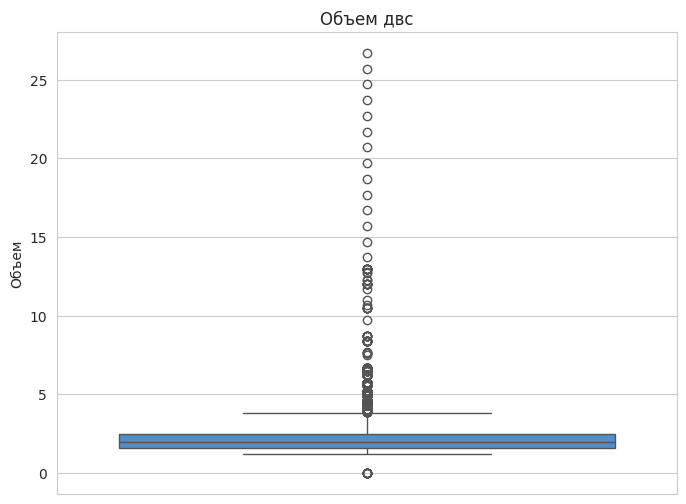

In [55]:
data = df['engine_vol'].astype(float)
data = data[~np.isnan(data)]

plt.figure(figsize=(8, 6))
sns.boxplot(data)
plt.title('Объем двс')
plt.ylabel('Объем')
plt.show()

Судя по данным есть авто с объемом двс более 15 л\
Посмотрим сколько двигателей ставили на модели, возможно увидим анамалии

In [56]:
df.groupby('model').agg({'engine_vol':'nunique'}).reset_index().nlargest(10,'engine_vol')

,model,engine_vol
171,Niva,26
86,Camry,5
92,Corolla,5
106,ES,5
91,Cerato,4
146,LC Prado,4
173,Optima,4
219,Soul,4
231,Tiguan,4
12,3302,3


In [57]:
df.loc[df['model']=='Niva'].groupby('engine_vol').agg({'model':'unique','brand':'count'}).reset_index()

,engine_vol,model,brand
0,1.7,[Niva],542
1,10.7,[Niva],1
2,11.7,[Niva],1
3,12.7,[Niva],1
4,13.7,[Niva],1
5,14.7,[Niva],1
6,15.7,[Niva],1
7,16.7,[Niva],1
8,17.7,[Niva],1
9,18.7,[Niva],1


In [58]:
df.loc[df['model'] == 'Niva', 'engine_vol'] = '1,7'

В данных объем двс на Chevrolet Niva достигает 26 л.\
Данные некорректные.
Установим на все Нивы объем двигателя 1,7

Посмотрим модели с максимальным количеством пропусков в объеме двигателя

In [59]:
engine = df[df.engine_vol.isna()].groupby('model')['model'].count().nlargest(10)

In [60]:
df[df.model.isin(engine.index)].groupby('model')['engine_vol'].value_counts()

model     engine_vol
3302      2.7            866
          2.8              3
          4.3              2
Duster    2               19
          1.6              6
Nexia R3  1.5           1202
          1.485          136
S3        1.6           1109
          1.5              2
S5        2              243
          2.0             87
Sandero   0                3
          1.6              1
Name: count, dtype: int64

У 5 моделей можно выделить самый распространеный объем двс.\
Заполним наиболее частыми значениями

In [61]:
dvs = {'3302': 2.7, 'Duster': 2, 'HFF6850G': 5, 'Nexia R3': 1.5, 'S3': 1.6}

In [62]:
for car in dvs.keys():
    df.loc[(df.model == car) & (df.engine_vol.isna()), 'engine_vol'] = dvs[car]

In [63]:
df['engine_vol'] = pd.to_numeric(df['engine_vol'], errors='coerce')

In [64]:
print(f'заполним оставшиеся {df.engine_vol.isna().sum()} пропуска 0')

заполним оставшиеся 3464 пропуска 0


In [65]:
df['engine_vol'] = df['engine_vol'].fillna(0)

In [66]:
df['engine_vol'] = round(df['engine_vol'],1)

In [67]:
df['engine_vol'].unique()

array([ 1.4,  2. ,  3. ,  4.4,  6.6,  1.5,  1.6,  2.4,  0. ,  6.2,  2.5,
        2.7,  2.8,  4.3,  3.9,  7.5, 12.3,  3.5,  5.6,  8.7,  5.2,  5. ,
        1.2,  3.3,  1.7,  1.8,  4.6,  5.7, 10.5,  4. ,  5.5, 12. , 12.8,
       11. ,  2.2, 13. ,  1.3,  3.8,  3.6,  7.6,  4.9,  2.9,  8.4,  6.7,
        6.5])

Измнили тип данных в столбце, округлили значения до 1 знака после запятой, там где объем двигателя не указан поставили 0

## Трансмиссия

In [68]:
df.gearbox.unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', nan, 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '0', '7 DSG', '7DSG', '6 DSG',
       '6DSG', '#Н/Д', 'DSG', '6A', '6А', '5M', 'A/T', 'M/T', 'МКП', '5М',
       'М/T', ' 7 АКП', '7АКП', 'А/T', '8A', 'TDI', '9AT', 'РЕДУКТОР'],
      dtype=object)

In [69]:
df = df.query('gearbox != "#Н/Д"')

Уберем 4 строчки где не указана кпп

In [70]:
df.query('gearbox == "0"')

,year,month,company,brand,model,country,fuel_type,engine_vol,gearbox,drive_type,region,client_type,quantity,price_usd,sales_usd,area,segment_2013,localization
24997,2019,Январь,Renault Россия,Renault,Sandero,RUS,F,0.00,0,0,Атырау,NaN,1.00,12476.90,12476.90,Атырауская область,Легковые автомобили,Импорт
25002,2019,Январь,Renault Россия,Renault,Sandero,RUS,F,0.00,0,0,Атырау,NaN,1.00,12476.90,12476.90,Атырауская область,Легковые автомобили,Импорт
25023,2019,Январь,Renault Россия,Renault,Sandero,RUS,F,0.00,0,0,Нур-Султан,NaN,1.00,12476.90,12476.90,г.Нур-Султан,Легковые автомобили,Импорт


In [71]:
df['gearbox'] = df['gearbox'].apply(kpp)
df['gearbox'].unique()

array(['АТ', 'МТ', None], dtype=object)

посмотрим модели где больше всего пропусков

In [72]:
mod = df[df.gearbox.isna()].groupby('model')['model'].count().nlargest(15)

In [73]:
mod

,model
model,
Duster,650
Sandero,438
Nexia R3,361
Logan,320
Kaptur,230
S3,175
S5,162
NMR,89
D-MAX,73


In [74]:
df[df.model.isin(mod.index)].groupby('model')['gearbox'].value_counts()

model     gearbox
Duster    АТ          33
          МТ          24
HD 78     МТ           4
HFF6850G  МТ         186
Nexia R3  АТ         925
          МТ         413
S3        АТ         821
          МТ         290
S5        АТ         159
          МТ         126
Sandero   МТ           3
Name: count, dtype: int64

Можно выделить 6 моделей, где более распространена определенная кпп, заменим пропуски на этих моделях

In [75]:
df.gearbox.isna().sum()

np.int64(3258)

In [76]:
mt = {'H350':'МТ', 'HD 78':'МТ','HFF6850G':'МТ', 'N120':'МТ','S3':'АТ', 'Sandero':'МТ'}

In [77]:
for car in mt.keys():
    df.loc[(df.model== car) & (df.gearbox.isna()), 'gearbox'] = mt[car]

In [78]:
print(f'Осталось {df.gearbox.isna().sum()} пропусков, заменим на unk')

Осталось 2488 пропусков, заменим на unk


In [79]:
df.gearbox = df.gearbox.fillna('unk')

## Тип привода

In [80]:
df['drive_type'].unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана',
       'Передний (FF)', '0', 'FF', 'полный', '4Motion'], dtype=object)

In [81]:
df['drive_type'] = df['drive_type'].str.upper()
df['drive_type'] = df['drive_type'].str.replace(r'^4[a-zA-Zа-яА-ЯёЁ]2$', '2WD', regex=True)
df['drive_type'] = df['drive_type'].str.replace(r'^4[a-zA-Zа-яА-ЯёЁ]4$', '4WD', regex=True)


In [82]:
df[df['drive_type']=='0'].groupby('model').agg({'brand':'count'})

,brand
model,
Duster,12
Kaptur,48
Logan,14
Sandero,42


In [83]:
df.loc[((df['model'] == 'Sandero') | (df['model'] == 'Logan')), 'drive_type'] = 'FWD'
df.loc[(df['drive_type'] == '0') & ((df['model'] == 'Kaptur')), 'drive_type'] = '2WD'
df.loc[(df['drive_type'] == '0') & ((df['model'] == 'Duster')), 'drive_type'] = '4WD'

In [84]:
df['drive_type'] = df['drive_type'].apply(replace_with_4wd)

In [85]:
print(f'Остальные {df.drive_type.isna().sum()} пропуска заполняем значением unk')

Остальные 3587 пропуска заполняем значением unk


In [86]:
df['drive_type'] = df['drive_type'].fillna('unk')

Для моделей Логан и Сандеро устанавливаем передний привод\
Каптюр вместо 0 укажем 2WD\
Дастер 4 WD

## Тип клиента

In [87]:
df['client_type'].unique()

array(['Физ. Лицо', 'Юр. Лицо', nan, 'Юр.Лицо', 'физ.лицо', 'юридическое',
       'физическое', 'ФизЛицо', 'ЮрЛицо', 'Корп. клиент'], dtype=object)

В данных есть пропуски, и различные описания юр.лица и физ.лица. приведем все к единому виду

In [88]:
df['client_type'] = df['client_type'].str.lower().str.replace('. ', '')

Далее будем считать что если клиент купил более 2 авто, или авто относится к коммерческому виду транспорта это Юридическое лицо

In [89]:
df

,year,month,company,brand,model,country,fuel_type,engine_vol,gearbox,drive_type,region,client_type,quantity,price_usd,sales_usd,area,segment_2013,localization
0,2019,Май,Mercur Auto,Audi,A3,DEU,F,1.40,АТ,FWD,Алматы,физлицо,1.00,28115.00,28115.00,г.Алматы,Легковые автомобили,Импорт
1,2019,Август,Mercur Auto,Audi,A3,DEU,F,1.40,АТ,FWD,Алматы,юрлицо,1.00,32246.99,32246.99,г.Алматы,Легковые автомобили,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,DEU,F,1.40,АТ,FWD,Алматы,физлицо,1.00,32000.00,32000.00,г.Алматы,Легковые автомобили,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,DEU,F,1.40,АТ,FWD,Алматы,юрлицо,1.00,31929.00,31929.00,г.Алматы,Легковые автомобили,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,DEU,F,1.40,АТ,FWD,Алматы,физлицо,1.00,31929.00,31929.00,г.Алматы,Легковые автомобили,Импорт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39961,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAZ,D,0.00,МТ,unk,Актобе,юрлицо,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Локальное производство
39962,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAZ,D,0.00,МТ,unk,Актобе,юрлицо,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Локальное производство
39963,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAZ,D,0.00,МТ,unk,Актобе,юрлицо,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Локальное производство
39964,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAZ,D,0.00,МТ,unk,Актобе,юрлицо,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Локальное производство


In [90]:
df.loc[(df.quantity > 2) | (df.segment_2013 == 'Коммерческие автомобили'), 'client_type'] = 'юр.лицо'

In [91]:
df['client_type'] = df['client_type'].fillna('физ.лицо')

In [92]:
df['client_type'] = df['client_type'].apply(lambda row: 'физ.лицо' if 'физ' in row else 'юр.лицо')

In [93]:
df['client_type'].unique()

array(['физ.лицо', 'юр.лицо'], dtype=object)

Заменили пропуски по количеству авто + сегмент "Коммерческие авто" для Юр.лиц \
Остальные клиенты относятся к Физ.лицу

In [94]:
result = (len(temp)-len(df))/len(temp)
print(f'В результате преобразований удалено {result:.2%} данных')

В результате преобразований удалено 0.03% данных


In [95]:
df.isna().sum()

,0
year,0
month,0
company,0
brand,0
model,0
country,0
fuel_type,0
engine_vol,0
gearbox,0
drive_type,0


**Данные подготовлены для анализа**\
Сделано:


*   Изменен тип данных
*   Удалены не нужные столбцы
*   Пропуски заполнены там где это было возможно, где нет возможности четко определить пропуск указали значения **0** и **unk**

После обработки потери данных составили всего 0,03%


# Исследовательский анализ


In [96]:
df.dtypes

,0
year,int64
month,object
company,object
brand,object
model,object
country,object
fuel_type,object
engine_vol,float64
gearbox,object
drive_type,object


Изменим тип данных в столбцах тип топлива, коробка передач, тип привода и сегмент на категории

In [97]:
category = ['fuel_type', 'gearbox', 'drive_type', 'segment_2013']

In [98]:
for col in category:
    df[col] = df[col].astype('category')

Посмотрим емкость рынка автомобилей: в денежном и количественном выражении

In [99]:
print(f'Емкость рынка Казахстана за 9 месяцев 2019 года {(int(df.quantity.sum()))} автомобилей')

Емкость рынка Казахстана за 9 месяцев 2019 года 53870 автомобилей


In [169]:
print(f'Емкость рынка авто за 9 месяцев 2019 года составлет {df.sales_usd.sum():_.2f} долларов'.replace('_', ' '))

Емкость рынка авто за 9 месяцев 2019 года составлет 1 349 016 452.40 долларов


### Локации производства

In [101]:
tr = df.groupby('localization').agg({'quantity':'sum','sales_usd':'sum'}).reset_index()

In [102]:
print(f'{tr.localization[0]} : {int(tr.quantity[0])} автомобилей,  {tr.sales_usd[0].sum():_.2f} долларов'.replace('_', ' '))
print(f'{tr.localization[1]} : {int(tr.quantity[1])} автомобилей,  {tr.sales_usd[1].sum():_.2f} долларов'.replace('_', ' '))

Импорт : 22505 автомобилей,  780 062 771.81 долларов
Локальное производство : 31365 автомобилей,  568 953 680.59 долларов


Исходя из данных импортируемых авто меньше и стоят дороже, с локальными производителями все наоборот

## Количество диллеров и брендов

In [103]:
df.company.nunique()

33

In [104]:
df.brand.nunique()

46

На рынке Казахстана представлено 33 дилера, которые торгуют  46 марками автомобилей

## Количество брендов в автоцентрах

Посмотрим сколько брендов представлено в каждом дилере

In [105]:
com_brand =  df.groupby('company').agg({'brand':'nunique'}).reset_index().sort_values('brand', ascending=False)
com_brand

,company,brand
0,Allur Auto,7
25,БИПЭК АВТО,5
29,СемАЗ,4
11,Mercur Auto,3
26,Вираж,3
12,Nissan Manufacturing RUS,2
1,Almaty Motors Premium,2
3,Autokapital,2
2,Astana Motors,2
30,ТК КАМАЗ,2


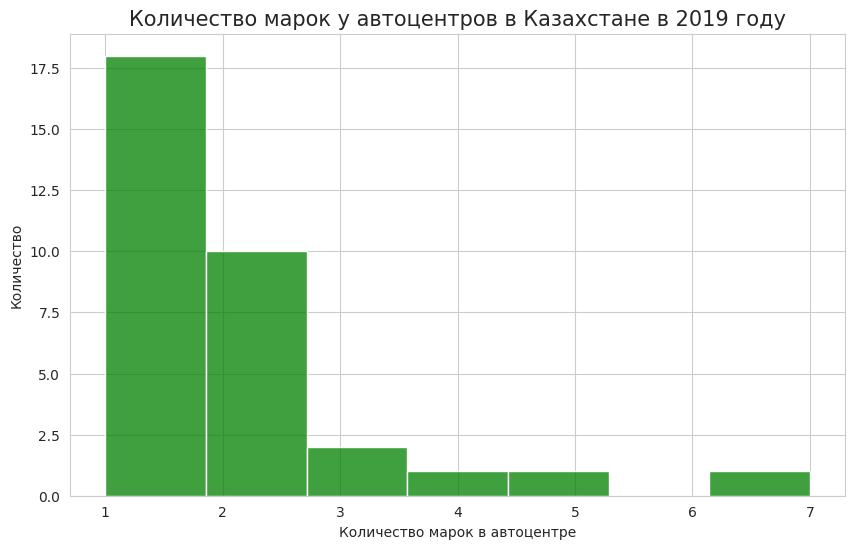

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(com_brand.brand,stat='count', bins=7, color='green')
plt.title('Количество марок у автоцентров в Казахстане в 2019 году', fontsize=15)
plt.xlabel('Количество марок в автоцентре')
plt.ylabel('Количество')
plt.show()

В 2019 году, 18 компаний которые работаю только с 1 брендом автомобилей.\
В остальных 15 компания представлено от 2 до 7 марок авто \
Максимальное количество брендов в дилере равно 7 и принадлежит Allur Auto

# Анализ рынка

## Лидеры рынка коммерческого и не коммерческого сегмента

In [107]:
com = df[df['segment_2013']=='Коммерческие автомобили']

In [108]:
cars = df[df['segment_2013']!='Коммерческие автомобили']

In [109]:
pie_com = (
    com.groupby('brand')['sales_usd'].sum().sort_values(ascending=False)
    .to_frame()
    .reset_index()
    .nlargest(10, 'sales_usd')
)
sizes_com = pie_com['sales_usd'].tolist()
labels_com = pie_com['brand'].tolist()

pie_cars = (
    cars.groupby('brand')['sales_usd'].sum().sort_values(ascending=False)
    .to_frame()
    .reset_index()
    .nlargest(10, 'sales_usd')
)
sizes_cars = pie_cars['sales_usd'].tolist()
labels_cars = pie_cars['brand'].tolist()

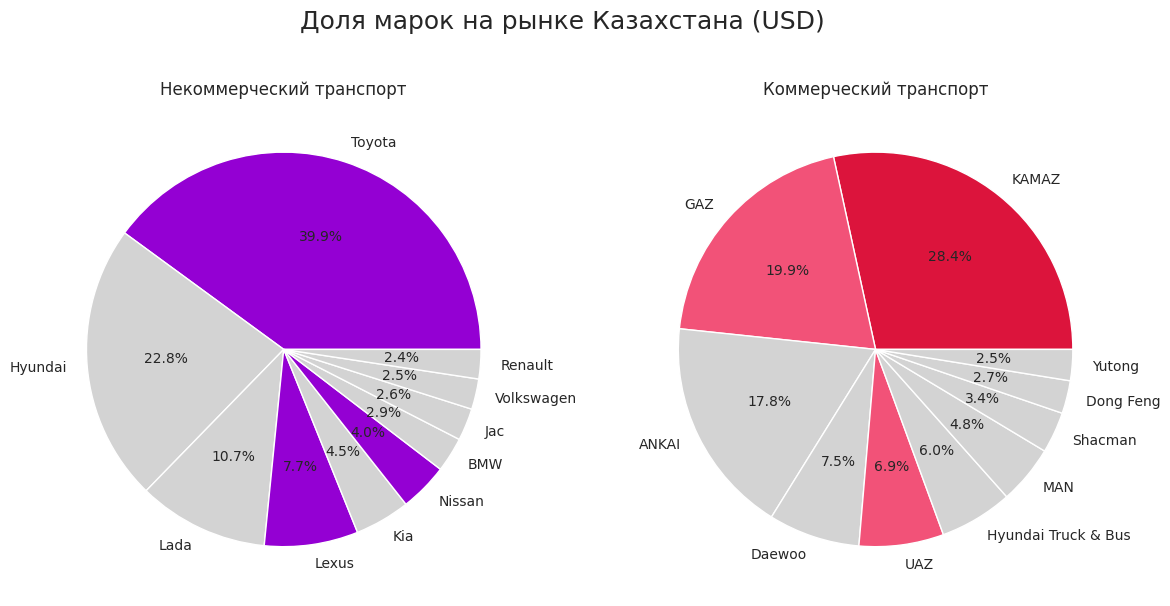

In [110]:
colors = ['lightgrey'] * 10
colors[0], colors[3], colors[5] = 'darkviolet', '#9400D3', '#9400D3'
colors_c = ['lightgrey'] * 10
colors_c[0], colors_c[1], colors_c[4]  = 'crimson', '#F25278', '#F25278'

plt.figure(figsize=(14, 7))
plt.suptitle('Доля марок на рынке Казахстана (USD)', fontsize=18)

plt.subplot(1, 2, 1)
plt.title('Некоммерческий транспорт', fontdict={'size': 12})
# рисуем круговую диаграмму
plt.pie(sizes_cars, labels=labels_cars, autopct='%1.1f%%', colors=colors)


plt.subplot(1, 2, 2)
plt.title('Коммерческий транспорт', fontdict={'size': 12})

# рисуем круговую диаграмму
plt.pie(sizes_com, labels=labels_com, autopct='%1.1f%%', colors=colors_c)
plt.show();

**Сегмент потребительских автомобилей:**

- Лидер Toyota с 40% рынка;
- Второе место Hyundai (23%) и третье место Lada (11%);
- Три лидера занимают 73,5% всего рынка потребительских автомобилей
- Японские марки занимают 52% процента рынка.

**Сегмент коммерческого транспорта:**

- Лидер Камаз с 28% рынка;
- Второе место ГАЗ (20%), третье - ANKAI (18%);
- Лидеры занимают 66,1% рынка;
- Российские марки занимают 55% рынка.

## Топ 10 моделей по продажам

In [111]:
top = df.groupby(['brand','model']).agg({'quantity':'sum',
                                         'sales_usd':'sum'}).reset_index().nlargest(10,'quantity')

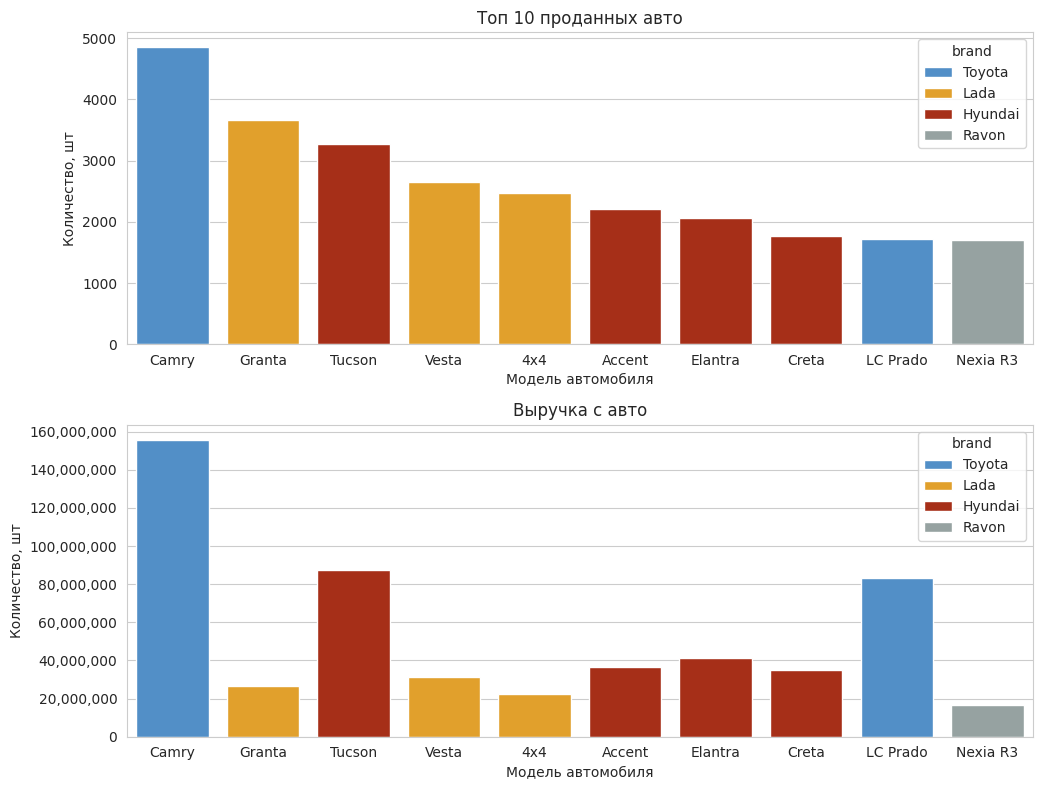

In [112]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
sns.barplot(x='model', y='quantity', data=top, hue='brand',ax=ax1)
ax1.set_title('Топ 10 проданных авто')
ax1.set_xlabel('Модель автомобиля')
ax1.set_ylabel('Количество, шт')


sns.barplot(x='model', y='sales_usd', data=top, hue='brand',ax=ax2)
ax2.set_title("Выручка с авто")
ax2.set_xlabel('Модель автомобиля')
ax2.set_ylabel('Количество, шт')

plt.tight_layout()
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()


В Казахстане любят Toyota Camry по количеству проданных машин она на первом месте.\
Так же в топ входят 3 модели Лада (Granta, Vesta, 4x4). \
У Hyundai 4 модели (Tucson, Accent, Elantra, Creta). \
По стоимости Toyota Camry тоже лидирует, затем идет Hyundai Tucson и Toyota LC Prado

## Динамика рынка

In [113]:
df['date_price'] = df['month'].apply(format_month_to_date)

Поменяем формат даты, для более удобной работы

In [114]:
ph = df.pivot_table(index='date_price', values='quantity', aggfunc='sum').reset_index()

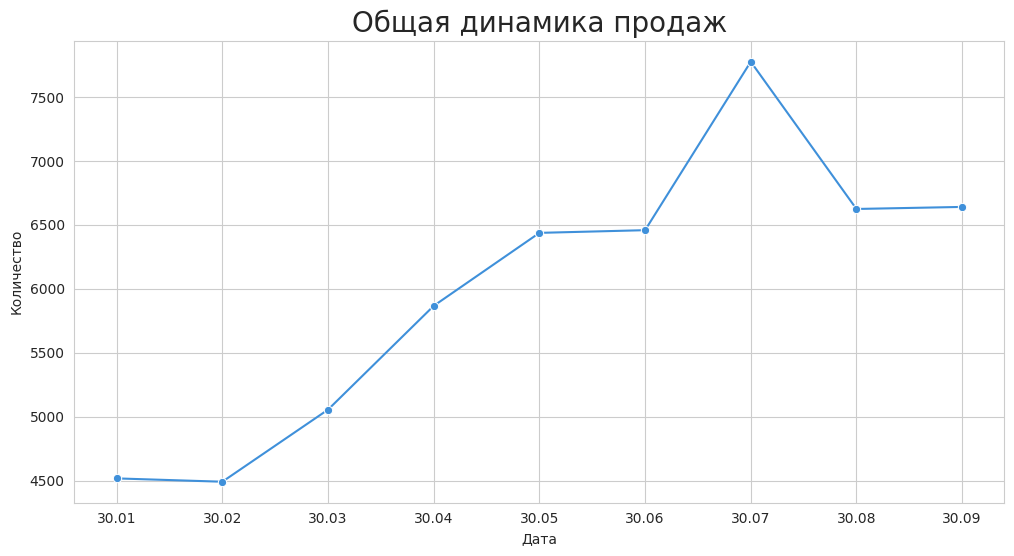

In [115]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.lineplot(data=ph, x="date_price", y="quantity",marker="o")
plt.title('Общая динамика продаж', fontsize=20)
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.grid(True)
plt.show();

С приходом весны, появлением солнца люди охотнее начинают покупать машины, по графику наблюдается активный рост до августа. Посмотрим чем обусловлен высокий спрос в июле

## Динамика продаж по сегментам

In [116]:
rr = df.pivot_table(index=['date_price','segment_2013'], values='quantity', aggfunc='sum').reset_index()

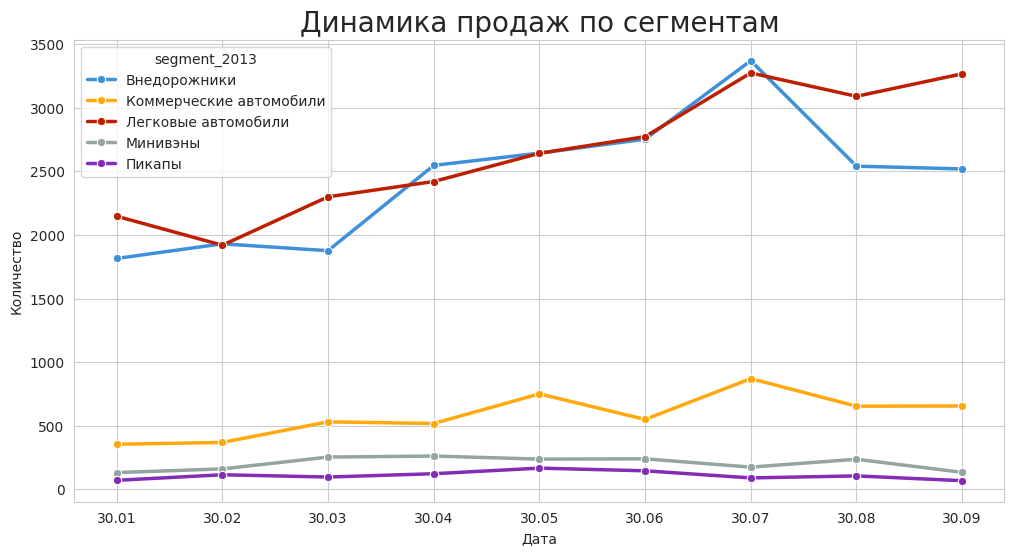

In [117]:

plt.figure(figsize=(12,6))
sns.lineplot(
    data=rr,
    x="date_price",          # ось X — числовая (год)
    y="quantity",    # ось Y — числовая (популяция)
    hue="segment_2013",        # цветом выделяем виды
    marker="o",       # добавляем точки
    linewidth=2.5
)
plt.title('Динамика продаж по сегментам', fontsize=20)
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show();

Стабильно высокие продажи в сегменте:
- Легковые
- Внедорожники

В сегменте:
Коммерческие автомобили, Минивэны, Пикапы
продажи не превышают 1000 в месяц

Наибольший спрос в июле, в сегменте Легковые авто и Внедорожники. Посмотрим какие модели продавались больше всего в июле

In [118]:
july = df[df['date_price']=='30.07']

In [119]:
july.groupby(['brand','model'])['quantity'].sum().reset_index().nlargest(5,'quantity')

,brand,model,quantity
54,Jac,S3,641.00
151,Toyota,Camry,629.00
88,Lada,Granta,433.00
90,Lada,Vesta,423.00
38,Hyundai,Tucson,411.00


In [120]:
model = list(july.groupby(['brand','model'])['quantity'].sum().reset_index().nlargest(5,'quantity')['model'])

In [121]:
data = df.query('model in @model')

In [122]:
data = data.groupby(['date_price','model']).agg({'quantity':'sum'}).reset_index()

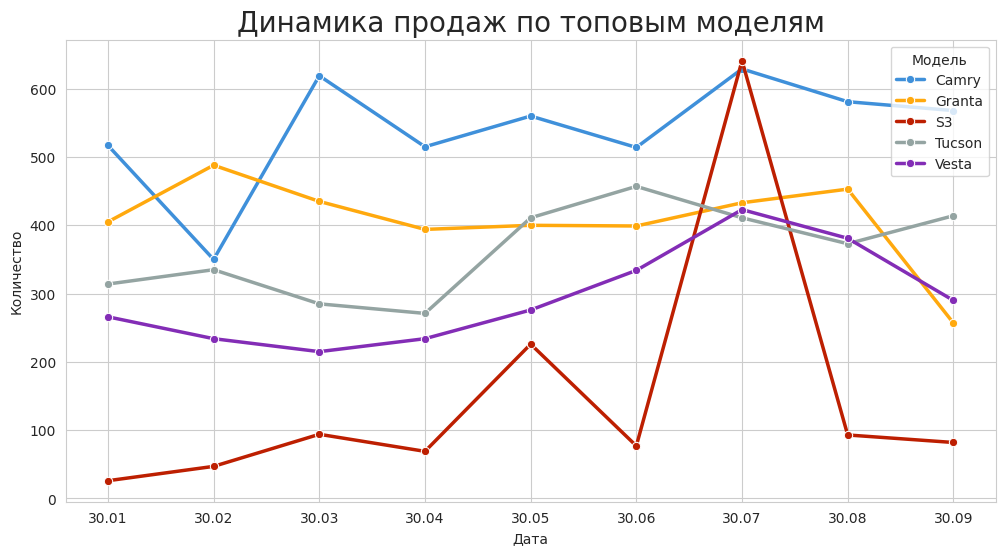

In [123]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=data,
    x="date_price",          # ось X — числовая (год)
    y="quantity",    # ось Y — числовая (популяция)
    hue="model",        # цветом выделяем виды
    marker="o",
    linewidth=2.5 # добавляем точк
)
plt.legend(
    title="Модель",  # Заголовок легенды
    loc="upper right",  # Позиция: верхний правый угол
)
plt.title('Динамика продаж по топовым моделям', fontsize=20)
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show();

Судя по графику Jac S3 был особенно популярен среди покупателей, количество продаж увеличилось примерно в 6 раз. Посмотрим что могло повлиять на такой спрос

In [124]:
df[df['model']=='S3'].groupby('date_price').agg({'price_usd':'describe'})

price_usd                                                       \
               count     mean     std      min      25%      50%      75%   
date_price                                                                  
30.01          26.00 13568.39 1111.82 12817.82 12817.82 12817.82 14501.32   
30.02          47.00 13086.10 1213.90 12380.01 12380.01 12380.01 13020.45   
30.03          25.00 14003.76 1129.37 10607.43 13050.40 14164.46 14960.21   
30.04          69.00 13196.55  615.21 12172.41 12947.37 12947.37 12947.37   
30.05         226.00 12954.44  736.98  9927.55 12310.53 12947.37 12947.37   
30.06          77.00 13971.98  819.44 12617.22 12878.99 13978.41 14763.72   
30.07         641.00 12942.58 1379.11  8780.58 12819.74 12819.74 13914.10   
30.08          93.00 13017.18 2124.41  8500.41 12722.98 12722.98 13809.09   
30.09          82.00 12576.02 1940.68  8405.47 12194.40 12711.11 14571.27   

                     
                max  
date_price           
30.01      15592.82  
30.02      15613.95  
30.03      15649.87  
30.04      14859.82  
30.05      14933.67  
30.06      15205.32  
30.07      14695.80  
30.08      18370.74  
30.09      16689.79

In [125]:
jac = df.loc[(df['model']=='S3')&(df['date_price']=='30.07')]

In [126]:
jac.groupby('region').agg({'quantity':'sum',
                           'price_usd':'median'}).reset_index()

,region,quantity,price_usd
0,Актобе,4.00,13914.10
1,Алматы,13.00,14046.99
2,Атырау,5.00,12819.74
3,Караганда,7.00,13914.10
4,Кокшетау,2.00,13366.92
5,Костанай,19.00,12819.74
6,Кызылорда,6.00,13757.77
7,Нур-Султан,17.00,14695.80
8,Павлодар,5.00,12819.74
9,Петропавловск,2.00,13366.92


Jac S3 в июле отправлялся на экспорт в количестве 543 шт, из-за этого наблюдается пик по продажам в июле

## Продажи автомобилей по сегментам

In [127]:
auto = df.groupby(['segment_2013','brand'])["sales_usd"].sum().reset_index()
auto = auto.groupby("segment_2013").apply(
    lambda x: x.nlargest(5, "sales_usd")
).reset_index(drop=True)

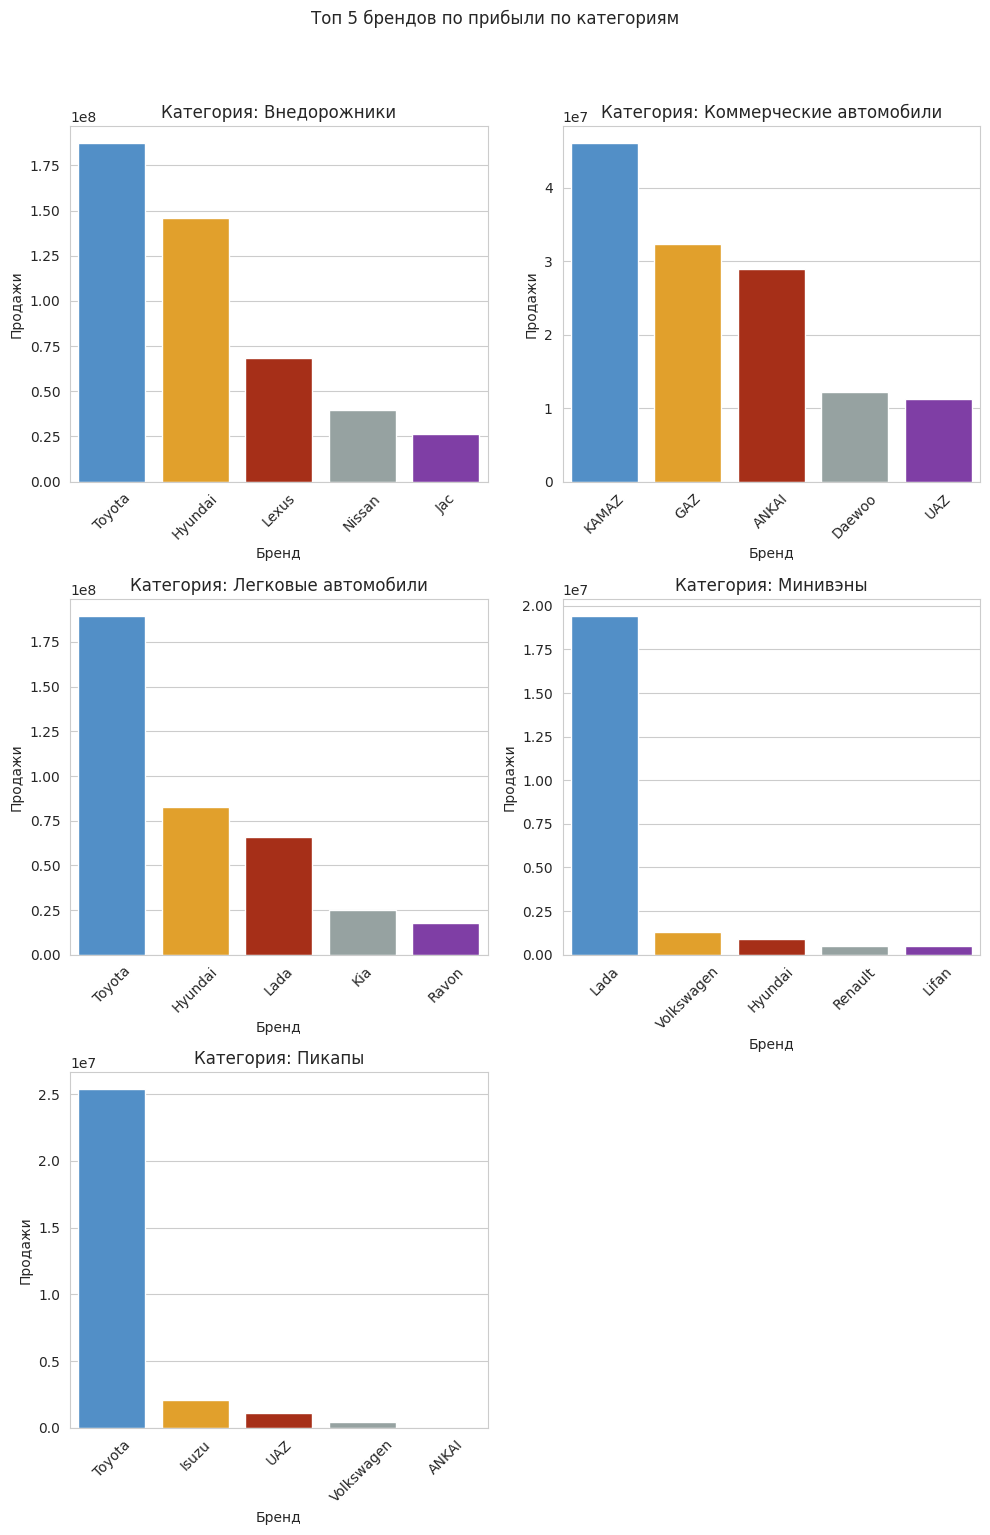

In [128]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes = axes.flatten()  # преобразуем в плоский массив

# Перебираем категории и строим barplot
for i, category in enumerate(auto["segment_2013"].unique()):
    df_subset = auto[auto["segment_2013"] == category]
    sns.barplot(
        data=df_subset,
        x="brand",
        y="sales_usd",
        hue='brand',
        ax=axes[i]  # цветовая схема
    )
    axes[i].set_title(f"Категория: {category}")
    axes[i].set_xlabel("Бренд")
    axes[i].set_ylabel("Продажи")
    axes[i].tick_params(axis="x", rotation=45)  # поворот подписей

fig.delaxes(axes[5])
# Общие настройки
plt.suptitle("Топ 5 брендов по прибыли по категориям", y=1.02)
plt.tight_layout()
plt.show()

Среди **внедорожников** больше денег принесли:
- Toyota
- Hyundai
- lexus

**В коммерческом сегменте**:
- KAMAZ
- GAZ
- ANKAI - Китайская компания, специализирующаяся на производстве автобусов

**Легковые авто**:
- Toyota
- Hyundai
- LADA

В сегменте **Минивены** лидером с большим отрывом является LADA \
В сегменте **Пикапы** лидер Toyota

## Продажи по маркам

In [129]:
brand = df.groupby('brand').agg({'quantity':'sum','sales_usd':'sum'}).reset_index().sort_values('quantity',ascending=False)

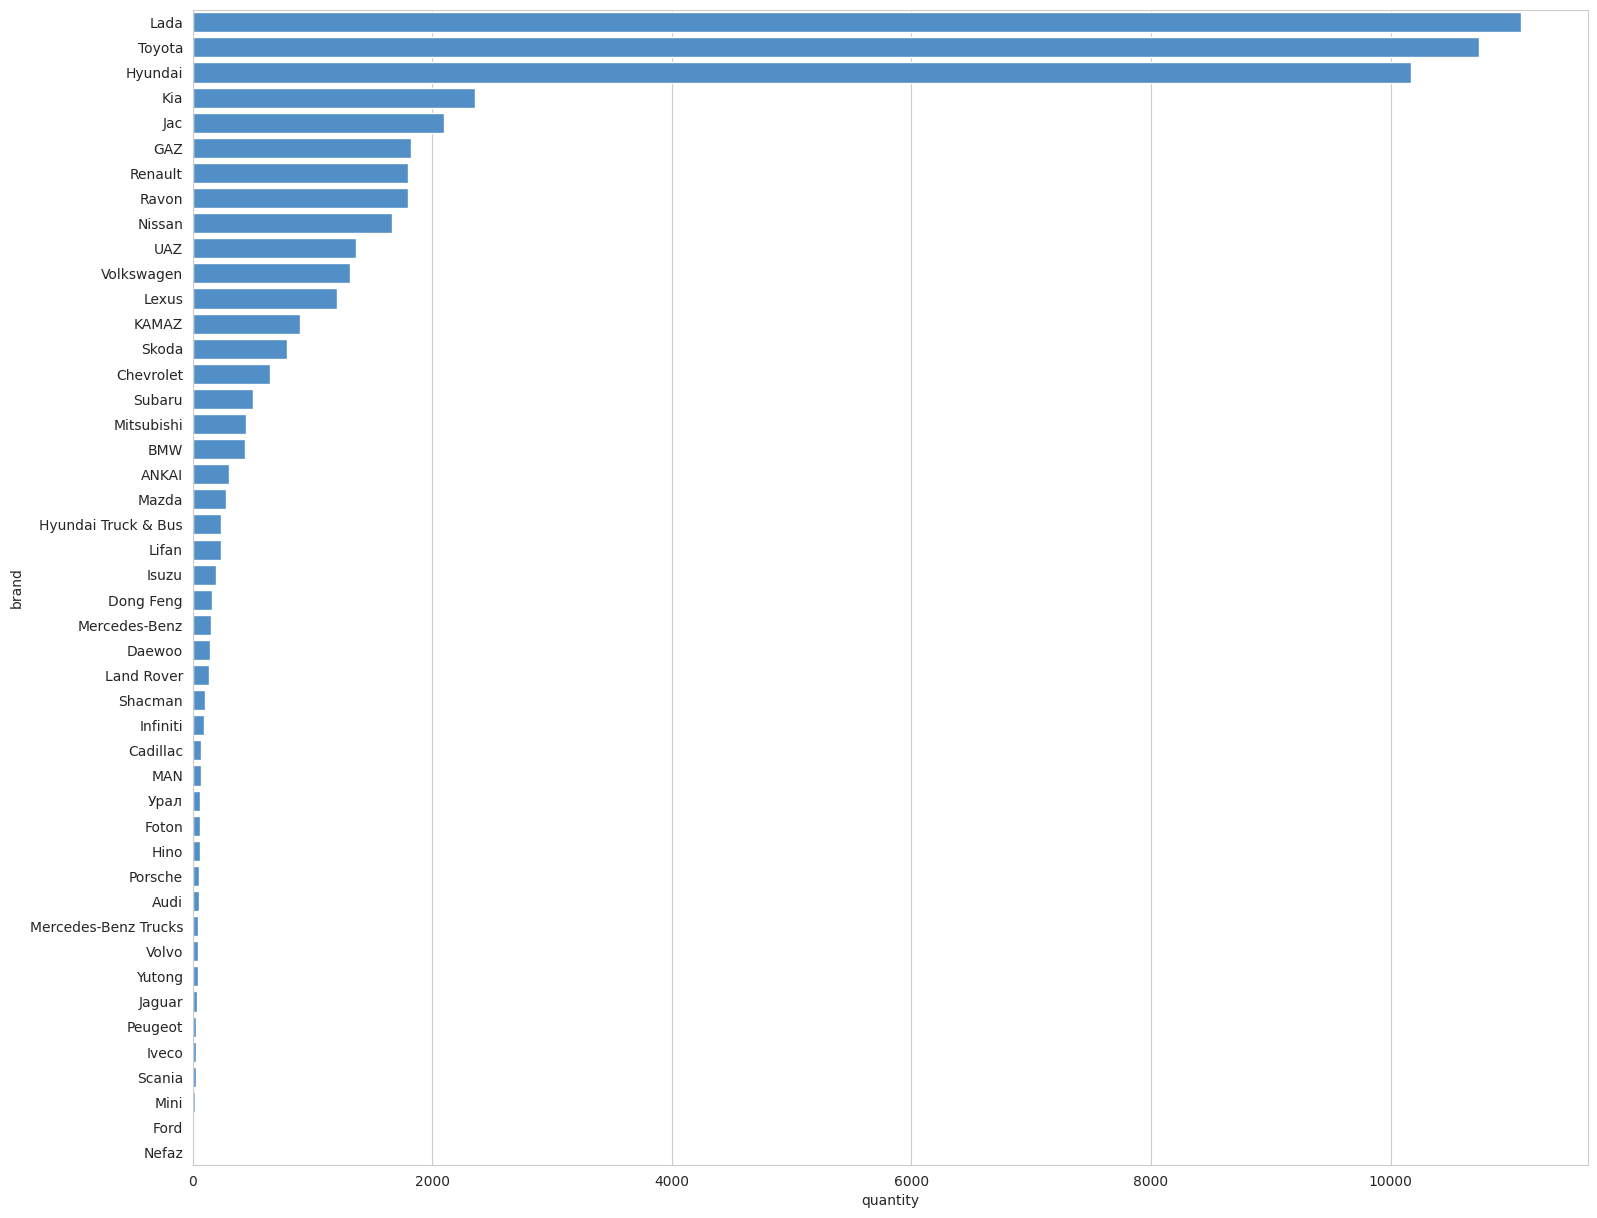

In [130]:
plt.figure(figsize=(18,15))
sns.barplot(
    data=brand,
    y='brand',
    x='quantity'
)
plt.show();

- LADA
- Toyota
- Hyundai

Продались в количестве более 10 000 автомобилей за весь представленый период

## Продажи по компаниям

In [131]:
# Рассчитываем общее количество проданных автомобилей
total_sold = df['sales_usd'].sum()

# Добавляем столбец с процентами
data = df.groupby('company')['sales_usd'].sum().reset_index()
data['percent'] = (data['sales_usd']/total_sold)*100
data = data.sort_values('percent', ascending=False)

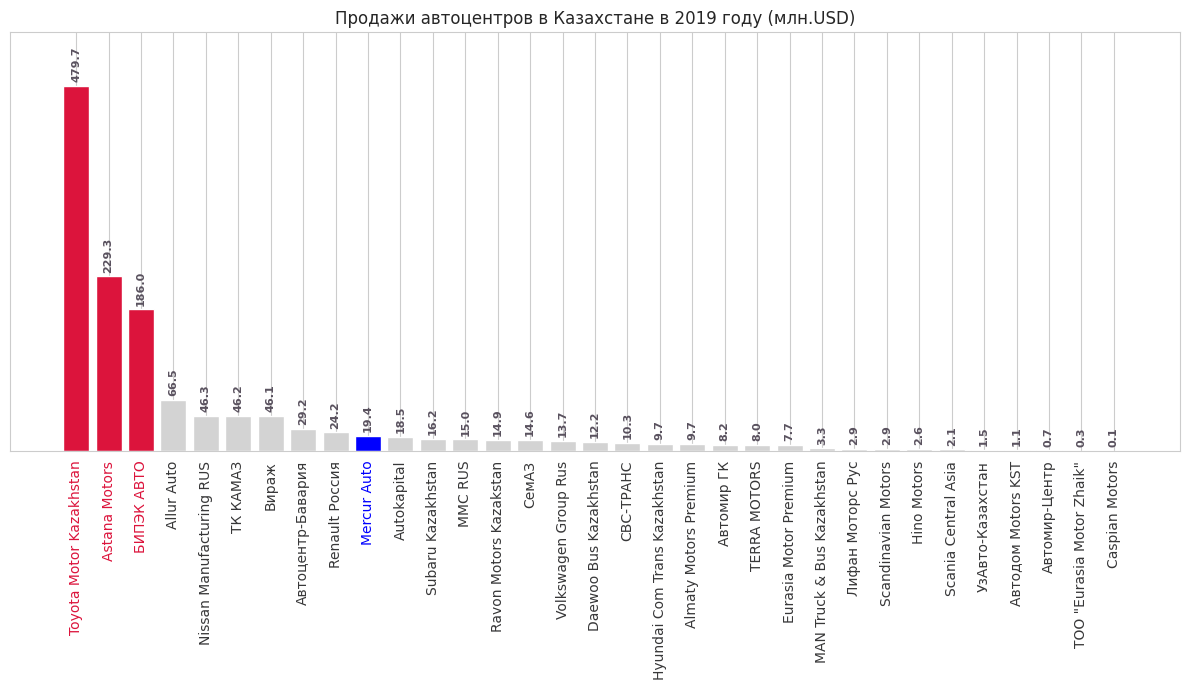

In [132]:
plt.figure(figsize=(12, 7))

bars = data.company.tolist()
heights = data.sales_usd.tolist()
heights = [x / 1000 for x in heights]
colors = ['lightgrey'] * len(heights)
colors[0], colors[1], colors[2] = 'crimson', 'crimson', 'crimson'
colors[9] = 'blue'
plt.title('Продажи автоцентров в Казахстане в 2019 году (млн.USD)')

plt.bar(bars, heights, color = colors)
plt.xticks(bars, rotation=90)
plt.ylim(0,550000)

for x, y, tex in zip(data.company, data.sales_usd/1000, data.sales_usd/1000):
    t = plt.text(x, y+5000, round(tex/1000,1),
                 horizontalalignment='center',
                 rotation='vertical',
                 verticalalignment='bottom',
                 fontdict={'color':'#59515E', 'size': 8, 'weight': 'bold'})

ax = plt.gca()
ax.get_yaxis().set_visible(False)

tick_colors = ['#373738'] * 33
tick_colors[0], tick_colors[1], tick_colors[2] = 'crimson', 'crimson', 'crimson'
tick_colors[9] = 'blue'
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), tick_colors):
    ticklabel.set_color(tickcolor)

plt.tight_layout()
plt.show();

Toyota Motor лидер по выручке. Ближайшие конкуренты отстают по выручке больше, чем в два раза.\
 **Меркур авто** находится на 10 месте по продажам в долларах.
Автоцентр Allur Auto где представлено 7 брендов, сильно уступает по выручке Toyota Motor где всего 2 бренда

## Продажи по региону

In [133]:
region = df.groupby('region').agg({'quantity':'sum','sales_usd':'sum'}).reset_index().sort_values('quantity',ascending=False)

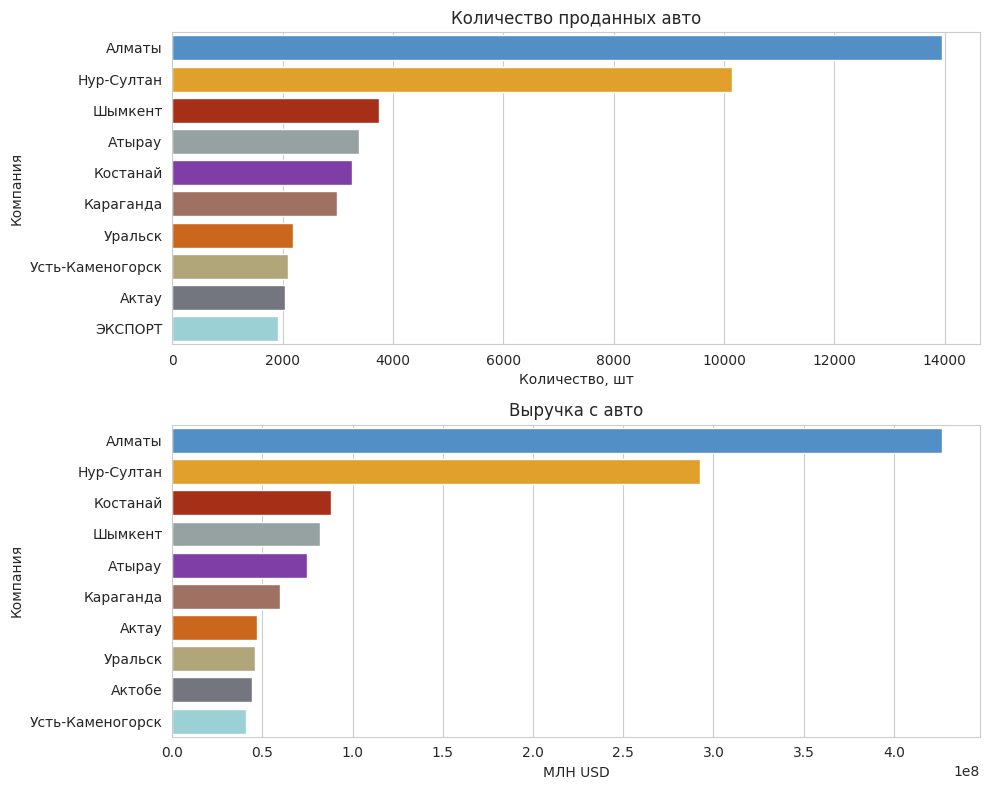

In [134]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
sns.barplot(y='region', x='quantity', data=region.nlargest(10,'quantity'),hue='region',ax=ax1)
ax1.set_title('Количество проданных авто')
ax1.set_xlabel('Количество, шт')
ax1.set_ylabel('Компания')


sns.barplot(y='region', x='sales_usd', data=region.nlargest(10,'sales_usd'),hue='region',ax=ax2)
ax2.set_title("Выручка с авто")
ax2.set_xlabel('МЛН USD')
ax2.set_ylabel('Компания')

plt.tight_layout()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

Самые высокие продажи в количественном и денежном эквиваленте это крупные города Алматы и Нур-Султан

In [135]:
region = region.nlargest(10,'sales_usd')

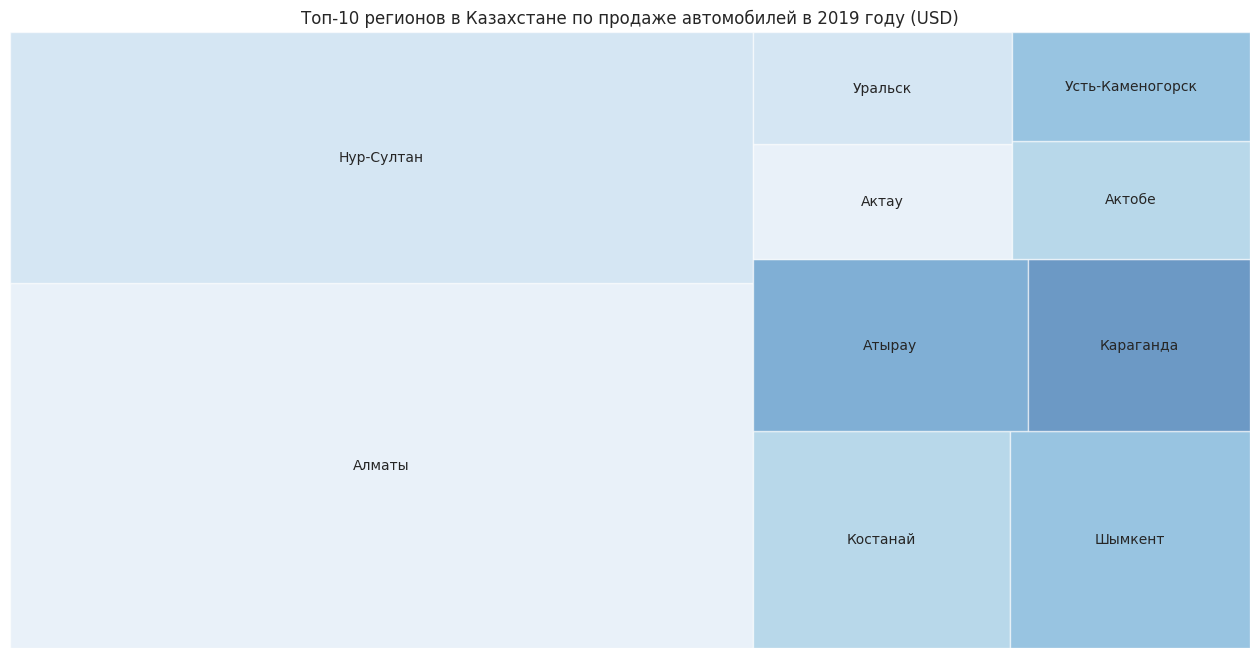

In [136]:
plt.figure(figsize=(16, 8))
plt.title('Топ-10 регионов в Казахстане по продаже автомобилей в 2019 году (USD)')
squarify.plot(sizes=region['sales_usd'], label=region['region'], alpha=.6, color = sns.color_palette("Blues"))
plt.axis('off')
#plt.show()
plt.savefig('regions.png', dpi=800)

Больше половины продаж приходится на два города: Алматы и Нур-Султан(Астана).

## Гипотеза: стоимость автомобиля зависит от уровня развития региона (средней заработной платы по региону)

In [137]:
salary = {
    'г.Алматы': 224158,
    'г.Нур-Султан': 226796,
    'Восточно-Казахстанская область': 162182,
    'Западно-Казахстанская область': 183914,
    'Костанайская область': 145890,
    'Павлодарская область': 160670,
    'Южно-Казахстанская область': 110254,
    'Мангистауская область': 294099,
    'Атырауская область': 351103,
    'Актюбинская область': 156595,
    'Карагандинская область': 172239,
    'Северо-Казахстанская область': 130233,
    'Акмолинская область': 140272,
    'Кызылординская область': 152085,
    'Жамбылская область': 127043,
    'Туркестанская область': 123853,
    'Алматинская область': 136212
}

Данные по заработной плате взяты с официального сайта статистики РК \


[Данные по зарплате](https://stat.gov.kz/ru/industries/labor-and-income/stat-wags/)

Создадим таблицу со средним уровнем зарплаты в регионе и средней стоимостью авто

In [138]:
salary

{'г.Алматы': 224158,
 'г.Нур-Султан': 226796,
 'Восточно-Казахстанская область': 162182,
 'Западно-Казахстанская область': 183914,
 'Костанайская область': 145890,
 'Павлодарская область': 160670,
 'Южно-Казахстанская область': 110254,
 'Мангистауская область': 294099,
 'Атырауская область': 351103,
 'Актюбинская область': 156595,
 'Карагандинская область': 172239,
 'Северо-Казахстанская область': 130233,
 'Акмолинская область': 140272,
 'Кызылординская область': 152085,
 'Жамбылская область': 127043,
 'Туркестанская область': 123853,
 'Алматинская область': 136212}

In [139]:
salary = (
    pd.DataFrame.from_dict(salary, orient='index', columns=['salary'])
    .reset_index().rename(columns={'index':'area'})
)

In [140]:
region_salary = df.groupby('area')['sales_usd'].mean().reset_index()
region_salary["sales_usd"] = region_salary["sales_usd"].astype(int)

In [141]:
salary

,area,salary
0,г.Алматы,224158
1,г.Нур-Султан,226796
2,Восточно-Казахстанская область,162182
3,Западно-Казахстанская область,183914
4,Костанайская область,145890
5,Павлодарская область,160670
6,Южно-Казахстанская область,110254
7,Мангистауская область,294099
8,Атырауская область,351103
9,Актюбинская область,156595


In [142]:
salary = salary.merge(region_salary, left_on='area', right_on='area', how='left').sort_values(by='salary', ascending=False)

Проверим связь между средней зарплатой в регионе с стоимостью автомобиля

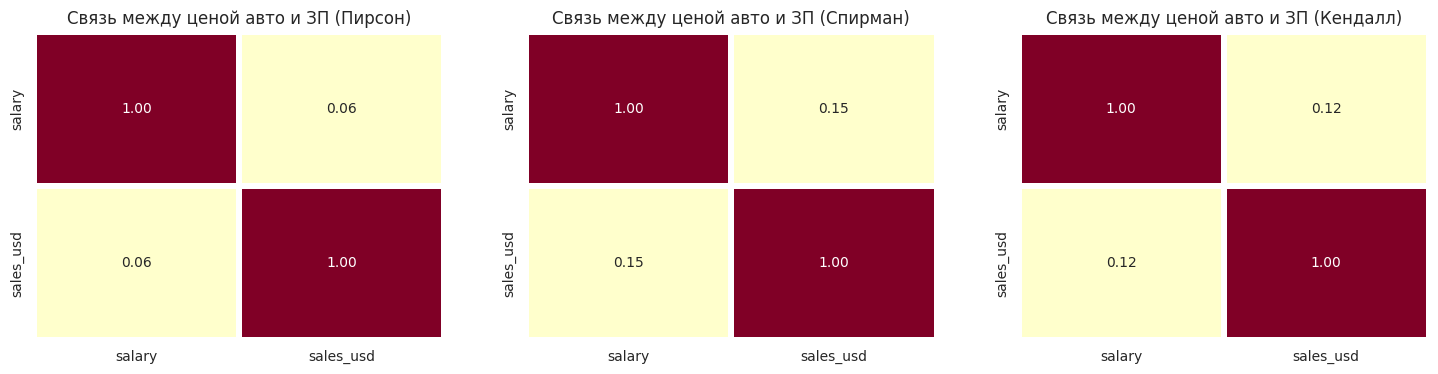

In [143]:
plt.figure(figsize=(18, 4))
cor = {'pearson':'Пирсон', 'spearman': 'Спирман', 'kendall': 'Кендалл'}
for num, el in enumerate(['pearson', 'spearman', 'kendall']):
    plt.subplot(1, 3, num+1)
    plt.title(f'Связь между ценой авто и ЗП ({cor[el]})')
    sns.heatmap(salary[['salary', 'sales_usd']].corr(method=el),
                annot=True,
                cmap='YlOrRd',
                cbar=False,
                linewidth=3,
                fmt='.2f')

**Зависимости между средней заработной платой и средней стоимостью автомобиля в регионах Казахстана нет**

Самые дорогие машины (по средней стоимости) покупают жители регионов с самой низкой средней заработной платой по Казахстану в целом.

#### Рынок Казахстана вывод:
<font color="blue">**Тoyota монополист на рынке**</font>
- Toyota Camry пользуется большим спросом как в количественном, так и в  денежном эквиваленте. Японские автомобили пользуются большой популярностью потребительского рынка;
- Российские производители лидеры коммерческого рынка, самый популярный бренд "КАМАЗ";

- Продажи в Алматы и Нур-Султан (Астана) занимают более половины (50%) от всех проданных авто Казахстана;

- Самые продаваемые бренды: Lada, Toyota, Hyundai

- Три самых продаваемых бренда: Lada, Toyota, Hyundai

Самые дорогие машины (по средней стоимости) покупают жители регионов с самой низкой средней заработной платой по Казахстану в целом.

# ***Анализ положения Меркур Авто:***

In [144]:
merc = df[df['company']=='Mercur Auto']

## <font size="+1">**Бренды**</font>

In [145]:
list(merc.brand.unique())

['Audi', 'Porsche', 'Volkswagen']

## <font size="+1">**Показатели выручки**</font>

In [146]:
row = merc['sales_usd'].sum().round(2)
print(f'Продажи Меркур авто за 9 месяцев 2019 года (все марки): {row:_.2f} $'.replace('_', ' '))

Продажи Меркур авто за 9 месяцев 2019 года (все марки): 19 355 275.98 $


In [147]:
merc_qua = merc.quantity.sum().round(2)
print(f'Продажи Меркур авто за 9 месяцев 2019 года {merc_qua} автомобилей.')

Продажи Меркур авто за 9 месяцев 2019 года 650.0 автомобилей.


## <font size="+1">**Выручка по брендам**</font>

In [148]:
brand_merc = merc.groupby(['brand']).agg({'quantity':'sum',
                             'sales_usd':'sum'}).reset_index()
brand_merc['percent'] = brand_merc['sales_usd']/row
brand_merc

,brand,quantity,sales_usd,percent
0,Audi,52.00,4059490.43,0.21
1,Porsche,52.00,5113512.70,0.26
2,Volkswagen,546.00,10182272.86,0.53


Volkswagen за 5 месяцев продаж принес больше 50% выручки, чем Audi и Porsche за 9 месяцев.

Посмотрим среднюю стоимость продажи по брендам

In [149]:
merc.groupby('brand')['sales_usd'].mean()

,sales_usd
brand,
Audi,78067.12
Porsche,98336.78
Volkswagen,18891.04


Средняя цена продажи автомобиля:
- Porsche 100 тысяч долларов;
- Audi - 80 тысяч долларов;
- Volkswagen - 19 тысяч долларов.

Посмотрим как менялась цена и спрос на автомобили в динамике

In [150]:
total_sales = merc.groupby('date_price').agg({'sales_usd':'sum'}).astype('int').reset_index()

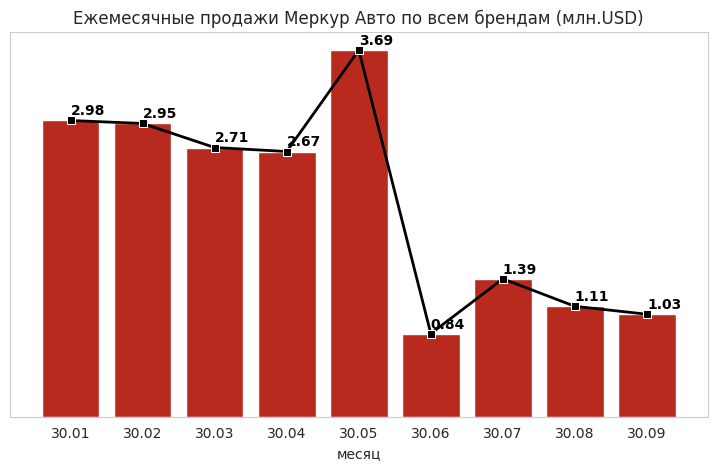

In [151]:
plt.figure(figsize=(9, 5))
plt.title('Ежемесячные продажи Меркур Авто по всем брендам (млн.USD)')
ax1 = sns.barplot(x=total_sales.date_price, y=total_sales.sales_usd / 1000, color='#D21404')
ax1 = sns.lineplot(total_sales.sales_usd / 1000, marker='s', color='black', linewidth=2)
plt.xticks(rotation=90)
plt.xlabel('месяц')
plt.ylabel('цена продажи, USD')
plt.xticks(rotation=360)
for x, y, tex in zip(total_sales.date_price, total_sales.sales_usd/1000, total_sales.sales_usd/1000):
    t = plt.text(x, y+100, round(tex/1000, 2),
                 horizontalalignment='left',
                 rotation='horizontal',
                 verticalalignment='center',
                 fontdict={'color':'black', 'weight':'bold'})

ax = plt.gca()
ax.get_yaxis().set_visible(False)

plt.show()

Наблюдается сильная просадка по продажам в июне. Попробуем
 определить причины - построим график продаж в разбивке по маркам автоцентра.

## <font size="+1">**Динамика продаж**</font>

In [152]:
brand = merc.groupby(['date_price','brand']).agg({'quantity':'sum',
                                                  'sales_usd':'sum'}).reset_index()

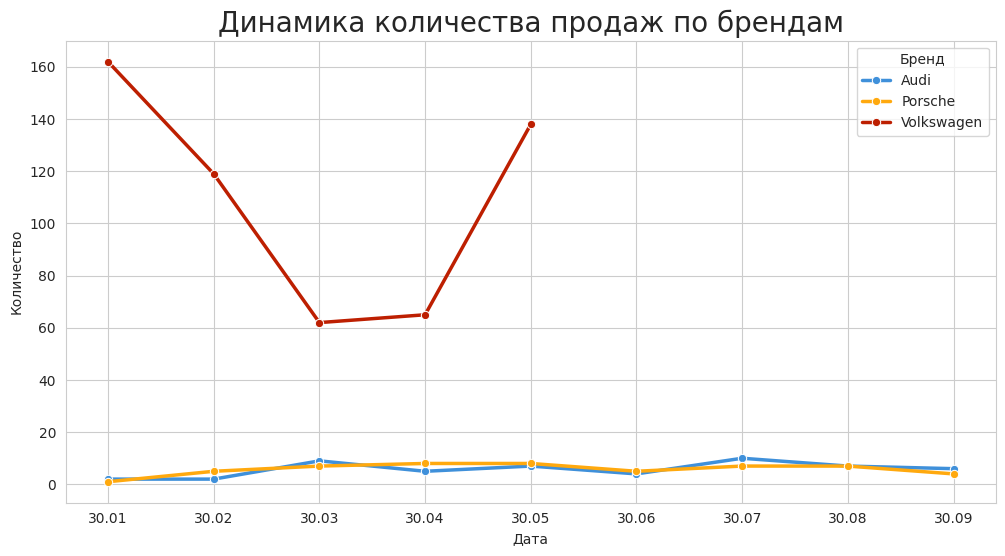

In [153]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=brand,
    x="date_price",          # ось X — числовая (год)
    y="quantity",    # ось Y — числовая (популяция)
    hue="brand",        # цветом выделяем виды
    marker="o",
    linewidth=2.5 # добавляем точк
)
plt.legend(
    title="Бренд",  # Заголовок легенды
    loc="upper right",  # Позиция: верхний правый угол
)
plt.title('Динамика количества продаж по брендам', fontsize=20)
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show();

Продажи брендов Porshe и Audi стабильно не большие\
У Volkswagen наблюдается спад продаж до марта и резкий спрос с апреля по май, после чего продажи прекратились

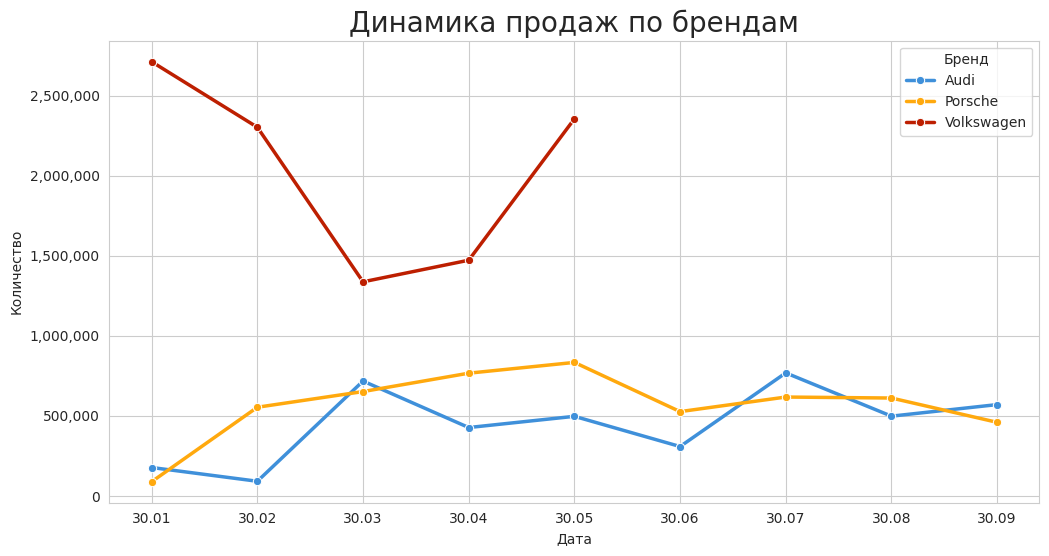

In [154]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=brand,
    x="date_price",          # ось X — числовая (год)
    y="sales_usd",    # ось Y — числовая (популяция)
    hue="brand",        # цветом выделяем виды
    marker="o",
    linewidth=2.5 # добавляем точк
)
plt.legend(
    title="Бренд",  # Заголовок легенды
    loc="upper right",  # Позиция: верхний правый угол
)
plt.title('Динамика продаж по брендам', fontsize=20)
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show();

Основную заработок приходил от Volkswagen, почему то продажи прекратились в мае 2019 года \
Маловероятно, что Volkswagen Audi Group приостановил дилерские соглашения, поскольку продажи других брендов группы (Audi и Porsche) продолжались в нормальном режиме.

Наиболее вероятная причина:
- Проблема связана с планированием продаж:
- Аналитики недооценили рыночный спрос
- Весь запланированный объем машин был распродан до июня
- Импортер ограничивает поставки сверх плана

Финансовые последствия:
- Упущенные продажи: 300-400 автомобилей
- Потерянный доход: 5-6 миллионов рублей

## <font size="+1">**Средняя цена продажи авто в динамике**</font>

In [155]:
merc_mean = merc.groupby('date_price').sales_usd.mean().round(2) \
.reset_index().rename(columns={'sales_usd':'mean_price_usd'})

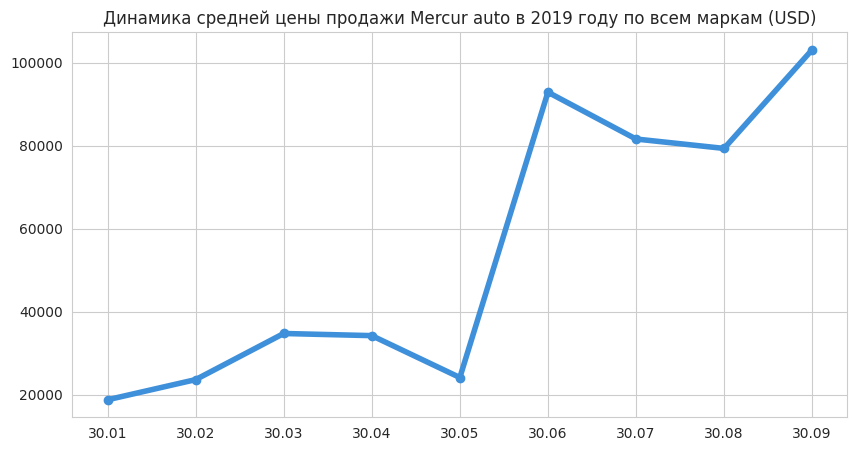

In [156]:
plt.figure(figsize=(10, 5))
plt.title('Динамика средней цены продажи Mercur auto в 2019 году по всем маркам (USD)')
plt.plot(merc_mean.date_price, merc_mean.mean_price_usd, marker='o', linewidth=4);

Виден скачек средней цены в июне 2019 года, в данном случае для автодилера это не несет никакой дополнительной выгоды, это связано с  остановкой продаж автомобилей Volkswagen, с июня 2019 года продаются два премиальных бренда: Audi, Porsche, чем и вызвано повышение средней цены (средняя цена Volkswagen - 19 тыс. долларов, Audi - 80 тысяч, Porsche - 100 тысяч).

## <font size="+1">**Продажи по регионам**</font>

In [157]:
merc.region.unique()

array(['Алматы', 'Нур-Султан', 'Костанай', 'Атырау', 'Караганда',
       'Уральск'], dtype=object)

Меркур Авто предтавлен в 6 регионах Казахстана

In [158]:
merc_sales = merc.groupby('region')['sales_usd'].sum().reset_index().sort_values('sales_usd', ascending=False)
merc_sales['percent'] = (merc_sales['sales_usd']/row)

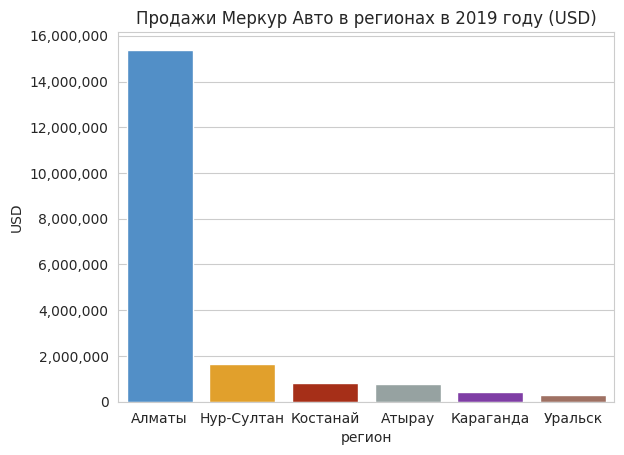

In [159]:
sns.barplot(merc_sales, x='region', y='sales_usd', hue='region')
plt.title('Продажи Меркур Авто в регионах в 2019 году (USD)')
plt.xlabel('регион')
plt.ylabel('USD')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show();

Лидер Алматы, на втором месте Нур-Султан. Основные продажи осуществляются в этих 2 городах

In [160]:
merc_sales

,region,sales_usd,percent
0,Алматы,15389449.83,0.80
4,Нур-Султан,1639059.14,0.08
3,Костанай,803347.62,0.04
1,Атырау,790024.51,0.04
2,Караганда,429448.93,0.02
5,Уральск,303945.96,0.02


In [161]:
mercur_reg = (
    merc.groupby(['region', 'brand'])['sales_usd'].sum().reset_index()
    .pivot_table(index='region', columns='brand', values='sales_usd', fill_value=0)
)

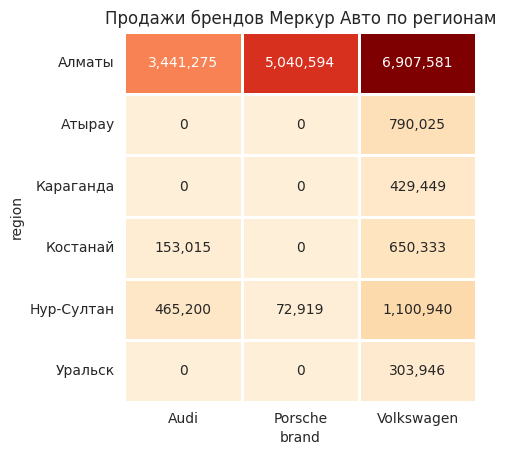

In [162]:
plt.title('Продажи брендов Меркур Авто по регионам')
sns.heatmap(mercur_reg, cbar=False,cmap='OrRd', annot=True, fmt=',.0f', center=3200000, vmin=0, linewidth=2)
plt.subplots_adjust(left=0.35)
plt.show()

16 миллионов из 19 общей выручки заработали Алматы. Volkswagen представлен во всех регионах.

Аламата приносит 80 процентов всех продаж, в то же время Volkswagen приносит более 50 процентов продаж. Самый выгодный сегмент в этой точки зрения - Volkswagen в Алматы - 40 процентов всех продаж дилера.

Меркур авто занимает 10 место по продажам в денежном выражении на рынке автомобилей Казахстана. Владеет тремя марками: Volkswagen, Audi, Porsche. Выручка за 9 месяцев 2019 года составила 19,35 млн. долларов


## <font size="+1">**Модели лидеры**</font>

In [163]:
total = merc.sales_usd.sum()

In [164]:
mod = merc.groupby(['brand','model']).agg({'quantity':'sum','sales_usd':'sum'}).reset_index().nlargest(5, 'quantity')
mod['per'] = mod['sales_usd']/total
mod

,brand,model,quantity,sales_usd,per
16,Volkswagen,Polo,440.00,6418764.24,0.33
18,Volkswagen,Tiguan,81.00,2642563.72,0.14
10,Porsche,Cayenne,28.00,2856255.46,0.15
7,Audi,Q8,20.00,1793118.33,0.09
11,Porsche,Macan,15.00,1015619.57,0.05


Основную прибыль Меркур Авто получает с одной модели - Polo (33% от всех продаж)

# Вывод:

#### Рынок Казахстана: <font color="black">**Тoyota монополист на рынке**</font>
- Toyota Camry пользуется большим спросом как в количественном, так и в  денежном эквиваленте. Японские автомобили пользуются большой популярностью потребительского рынка;
- Российские производители лидеры коммерческого рынка, самый популярный бренд "КАМАЗ";

- Продажи в Алматы и Астане занимают более половины (50%) от всех проданных авто Казахстана;

- Самые продаваемые бренды: Lada, Toyota, Hyundai

- Три самых продаваемых бренда: Lada, Toyota, Hyundai

**Зависимости между средней заработной платой и средней стоимостью автомобиля в регионах Казахстана нет**

Самые дорогие машины (по средней стоимости) покупают жители регионов с самой низкой средней заработной платой по Казахстану в целом.


<font color="black">**Меркур Авто:**</font>

Занимает позиции в середине списка среди всех автодидеров в Казахстане. Основную массу прибыли дилеру приносит Volkswagen Polo (33%), продажи которого с июня 2019 года приостановились. Дилеру необходимо более тщательно планировать план продаж в дальнейшем, чтобы избежать перевыполнения плана и как следствие отсутствие автомобилей для продажи.
- Стоит добавить еще одну марку VAG - Skoda. Skoda Rapid является практически полной копией Polo, а автоцентры дилера готовы работать с новой маркой без дополнительных инвестиций, так как уже работают с марками VAG.
- Маркетинг на автомобили премиум сегмента: Audi, Porsche.